<a href="https://colab.research.google.com/github/alexcom34/Alexandre__Gaspari/blob/main/newholand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lista NPS Positivo_V4.xlsx to Lista NPS Positivo_V4.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Lista NPS Positivo_V4.xlsx']), sheet_name='answers')

In [ ]:
def classifica_nota(nota):
  if nota >= 9:
    return 'promotor'
  elif nota >= 7:
    return 'neutro'
  else:
    return 'detrator'

# Aplicando a função à coluna 'nota' e criando a nova coluna 'target'
df['target'] = df['nota'].apply(classifica_nota)

In [ ]:
df.groupby("target").count()

,db-id,control_id,invite_id,Tipo Produto,Grupo de Produto,Familia do Produto,Modelo do Produto,Chassi do Produto,Marca do Produto,nome,...,"¿cómo evalúa la comodidad y la ergonomía de su <modelo> (considere, por ejemplo, la comodidad de los asientos, la visibilidad de la cabina, la comprensibilidad y la disposición de los controles)? (csat)",¿ha tenido algún problema con la confiabilidad/calidad en el que necesitaba comunicarse con su distribuidor? (like/dislike),¿el problema que tuvo afectó su capacidad para trabajar o le impidió trabajar? (like/dislike),¿hubo algún problema que requirió llevar el equipo <modelo> para mantenimiento? (like/dislike),¿se ha resuelto el problema? (like/dislike),você pode explicar que tipo de falhas afetaram o sistema elétrico? (like/dislike),"¿hubo alguna falla que afectó el sistema eléctrico (batería, alternador, interruptores, cableado y arranque, conexiones)? (like/dislike)","p3 - como você avalia a qualidade e a confiabilidade do seu <modelo> (considere o acabamento e a aparência da sua máquina, falhas, problemas de confiabilidade ou avarias que você possa ter tido)? (csat)",reacao,tag_de_tratativa
target,,,,,,,,,,,,,,,,,,,,,
detrator,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,...,42,41,22,39,14,4,30,3,1806,1603
neutro,4738,4738,4738,4738,4738,4738,4738,4738,4738,4738,...,146,141,71,141,78,5,135,1,3601,2946
promotor,18251,18251,18251,18251,18251,18251,18251,18251,18251,18251,...,407,386,107,383,180,16,365,5,12845,2385


In [ ]:
paises_unicos = df['mercado'].unique()
print(paises_unicos)

['BRASIL' 'ARGENTINA' 'IMPORTADO' '**' 'IM' 'LAI']


In [ ]:
df_brasil = df[df['mercado'] == 'BRASIL']

In [ ]:
contagem_por_target = df_brasil['target'].value_counts()

print("Contagem por target no Brasil:")
print(contagem_por_target)

Contagem por target no Brasil:
target
promotor    17416
neutro       4427
detrator     2046
Name: count, dtype: int64


In [ ]:
df_brasil_grupo11 = df[(df['mercado'] == 'BRASIL') & (df['Grupo de Produto'] == 'Grupo 11')]

contagem_por_target = df_brasil_grupo11['target'].value_counts()

percentual_por_target = (contagem_por_target / len(df_brasil_grupo11)) * 100

print("Contagem e percentual por target para o Grupo 11 no Brasil:")
print(contagem_por_target)
print(percentual_por_target)

Contagem e percentual por target para o Grupo 11 no Brasil:
target
promotor    1281
neutro       419
detrator     230
Name: count, dtype: int64
target
promotor    66.373057
neutro      21.709845
detrator    11.917098
Name: count, dtype: float64


In [ ]:
print(df_brasil_grupo11['estado'].unique())

['GO' '**' 'PR' 'RS' 'MS' 'TO' 'MT' 'MG' 'SP' 'SE' nan 'SC' 'PI' 'AC' 'PA'
 'PE' 'RO' 'MA' 'BA']


In [ ]:
df['data_resposta'] = pd.to_datetime(df['data_resposta'], format='%d/%m/%Y %H:%M:%S')


In [ ]:
df['safra'] = df['data_resposta'].dt.year

In [ ]:
df_brasil_grupo11['data_resposta'] = pd.to_datetime(df_brasil_grupo11['data_resposta'], format='%d/%m/%Y %H:%M:%S')


df_brasil_grupo11['safra'] = df_brasil_grupo11['data_resposta'].dt.year


df_grouped = df_brasil_grupo11.groupby('safra')['target'].value_counts().unstack(fill_value=0)


df_grouped['Total'] = df_grouped.sum(axis=1)

# Calculando os percentuais
df_grouped['%Promotores'] = (df_grouped['promotor'] / df_grouped['Total']) * 100
df_grouped['%Neutros'] = (df_grouped['neutro'] / df_grouped['Total']) * 100
df_grouped['%Detratores'] = (df_grouped['detrator'] / df_grouped['Total']) * 100

# Adicionando a linha de total geral
total_row = df_grouped.sum().rename('Total')
total_row['%Promotores'] = (total_row['promotor'] / total_row['Total']) * 100
total_row['%Neutros'] = (total_row['neutro'] / total_row['Total']) * 100
total_row['%Detratores'] = (total_row['detrator'] / total_row['Total']) * 100
df_grouped = pd.concat([df_grouped, total_row.to_frame().T], ignore_index=False)

print(df_grouped)
styled_df = df_grouped.style.format({'%Promotores': '{:.2f}%', '%Neutros': '{:.2f}%', '%Detratores': '{:.2f}%'}) \
                       .background_gradient(subset=['%Promotores', '%Neutros', '%Detratores'], cmap='Blues') \
                       .set_caption('Tabela de Volumetria por Safra') \
                       .set_table_styles([
                           {'selector': 'th', 'props': [('text-align', 'center')]},
                           {'selector': 'td', 'props': [('text-align', 'center')]}
                       ])

# Exibindo a tabela estilizada
styled_df

<ipython-input-13-bb0f43dd2c31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil_grupo11['data_resposta'] = pd.to_datetime(df_brasil_grupo11['data_resposta'], format='%d/%m/%Y %H:%M:%S')
<ipython-input-13-bb0f43dd2c31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil_grupo11['safra'] = df_brasil_grupo11['data_resposta'].dt.year


target  detrator  neutro  promotor   Total  %Promotores   %Neutros  \
2022        69.0   123.0     314.0   506.0    62.055336  24.308300   
2023       110.0   192.0     632.0   934.0    67.665953  20.556745   
2024        51.0   104.0     335.0   490.0    68.367347  21.224490   
Total      230.0   419.0    1281.0  1930.0    66.373057  21.709845   

target  %Detratores  
2022      13.636364  
2023      11.777302  
2024      10.408163  
Total     11.917098  


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores
2022,69.000000,123.000000,314.000000,506.000000,62.06%,24.31%,13.64%
2023,110.000000,192.000000,632.000000,934.000000,67.67%,20.56%,11.78%
2024,51.000000,104.000000,335.000000,490.000000,68.37%,21.22%,10.41%
Total,230.000000,419.000000,1281.000000,1930.000000,66.37%,21.71%,11.92%


In [ ]:
print(df_brasil_grupo11.columns)

Index(['db-id', 'control_id', 'invite_id', 'Tipo Produto', 'Grupo de Produto',
       'Familia do Produto', 'Modelo do Produto', 'Chassi do Produto',
       'Marca do Produto', 'nome',
       ...
       '¿el problema que tuvo afectó su capacidad para trabajar o le impidió trabajar? (like/dislike)',
       '¿hubo algún problema que requirió llevar el equipo <modelo> para mantenimiento? (like/dislike)',
       '¿se ha resuelto el problema? (like/dislike)',
       'você pode explicar que tipo de falhas afetaram o sistema elétrico? (like/dislike)',
       '¿hubo alguna falla que afectó el sistema eléctrico (batería, alternador, interruptores, cableado y arranque, conexiones)? (like/dislike)',
       'p3 - como você avalia a qualidade e a confiabilidade do seu <modelo> (considere o acabamento e a aparência da sua máquina, falhas, problemas de confiabilidade ou avarias que você possa ter tido)? (csat)',
       'reacao', 'tag_de_tratativa', 'target', 'safra'],
      dtype='object', length=152

In [ ]:
import numpy as np


df_brasil_grupo11 = pd.DataFrame({
    'estado': ['GO', '**', 'PR', 'RS', 'MS', 'TO', 'MT', 'MG', 'SP', 'SE', np.nan, 'SC', 'PI', 'AC', 'PA', 'PE', 'RO', 'MA', 'BA']
})


regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC'],
    'Não Mapeado': ['**', np.nan]
}


def get_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return 'Não Mapeado'


df_brasil_grupo11['regiao'] = df_brasil_grupo11['estado'].apply(get_regiao)

print(df_brasil_grupo11)


   estado        regiao
0      GO  Centro-Oeste
1      **   Não Mapeado
2      PR           Sul
3      RS           Sul
4      MS  Centro-Oeste
5      TO         Norte
6      MT  Centro-Oeste
7      MG       Sudeste
8      SP       Sudeste
9      SE      Nordeste
10    NaN   Não Mapeado
11     SC           Sul
12     PI      Nordeste
13     AC         Norte
14     PA         Norte
15     PE      Nordeste
16     RO         Norte
17     MA      Nordeste
18     BA      Nordeste


In [ ]:

from IPython.display import display

df_brasil_grupo11 = df[(df['mercado'] == 'BRASIL') & (df['Grupo de Produto'] == 'Grupo 11')]


df_brasil_grupo11['data_resposta'] = pd.to_datetime(df_brasil_grupo11['data_resposta'], format='%d/%m/%Y %H:%M:%S')
df_brasil_grupo11['safra'] = df_brasil_grupo11['data_resposta'].dt.year


regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC'],
    'Não Mapeado': ['**', np.nan]
}

def get_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return 'Não Mapeado'


df_brasil_grupo11['regiao'] = df_brasil_grupo11['estado'].apply(get_regiao)

# Função para gerar tabela volumétrica para uma região específica
def gerar_tabela_volumetrica(df, regiao_nome):
    df_regiao = df[df['regiao'] == regiao_nome]
    df_grouped = df_regiao.groupby('safra')['target'].value_counts().unstack(fill_value=0)
    df_grouped['Total'] = df_grouped.sum(axis=1)
    df_grouped['%Promotores'] = (df_grouped['promotor'] / df_grouped['Total']) * 100
    df_grouped['%Neutros'] = (df_grouped['neutro'] / df_grouped['Total']) * 100
    df_grouped['%Detratores'] = (df_grouped['detrator'] / df_grouped['Total']) * 100

    total_row = df_grouped.sum().rename('Total')
    total_row['%Promotores'] = (total_row['promotor'] / total_row['Total']) * 100
    total_row['%Neutros'] = (total_row['neutro'] / total_row['Total']) * 100
    total_row['%Detratores'] = (total_row['detrator'] / total_row['Total']) * 100
    df_grouped = pd.concat([df_grouped, total_row.to_frame().T], ignore_index=False)

    df_grouped['Região'] = regiao_nome
    return df_grouped

# Gerar tabelas volumétricas para cada região
df_sul = gerar_tabela_volumetrica(df_brasil_grupo11, 'Sul')
df_nordeste = gerar_tabela_volumetrica(df_brasil_grupo11, 'Nordeste')
df_norte = gerar_tabela_volumetrica(df_brasil_grupo11, 'Norte')
df_centro_oeste = gerar_tabela_volumetrica(df_brasil_grupo11, 'Centro-Oeste')
df_sudeste = gerar_tabela_volumetrica(df_brasil_grupo11, 'Sudeste')
df_nao_mapeado = gerar_tabela_volumetrica(df_brasil_grupo11, 'Não Mapeado')

# Função para estilizar a tabela
def estilizar_tabela(df, regiao_nome):
    return df.style.format({
        '%Promotores': '{:.2f}%',
        '%Neutros': '{:.2f}%',
        '%Detratores': '{:.2f}%'
    }) \
    .background_gradient(subset=['%Promotores', '%Neutros', '%Detratores'], cmap='Blues') \
    .set_caption(f'Tabela de Volumetria por Safra - Região {regiao_nome}') \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

# Exibindo as tabelas estilizadas separadamente
styled_df_sul = estilizar_tabela(df_sul, 'Sul')
styled_df_nordeste = estilizar_tabela(df_nordeste, 'Nordeste')
styled_df_norte = estilizar_tabela(df_norte, 'Norte')
styled_df_centro_oeste = estilizar_tabela(df_centro_oeste, 'Centro-Oeste')
styled_df_sudeste = estilizar_tabela(df_sudeste, 'Sudeste')
styled_df_nao_mapeado = estilizar_tabela(df_nao_mapeado, 'Não Mapeado')

# Usando display() para exibir todas as tabelas
display(styled_df_sul)
display(styled_df_nordeste)
display(styled_df_norte)
display(styled_df_centro_oeste)
display(styled_df_sudeste)
display(styled_df_nao_mapeado)


<ipython-input-16-48fc963cd531>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil_grupo11['data_resposta'] = pd.to_datetime(df_brasil_grupo11['data_resposta'], format='%d/%m/%Y %H:%M:%S')
<ipython-input-16-48fc963cd531>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil_grupo11['safra'] = df_brasil_grupo11['data_resposta'].dt.year
<ipython-input-16-48fc963cd531>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Região
2022,45.000000,68.000000,183.000000,296.000000,61.82%,22.97%,15.20%,Sul
2023,60.000000,114.000000,349.000000,523.000000,66.73%,21.80%,11.47%,Sul
2024,18.000000,34.000000,164.000000,216.000000,75.93%,15.74%,8.33%,Sul
Total,123.000000,216.000000,696.000000,1035.000000,67.25%,20.87%,11.88%,Sul


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Região
2022,1.000000,0.000000,4.000000,5.000000,80.00%,0.00%,20.00%,Nordeste
2023,1.000000,2.000000,6.000000,9.000000,66.67%,22.22%,11.11%,Nordeste
2024,1.000000,2.000000,9.000000,12.000000,75.00%,16.67%,8.33%,Nordeste
Total,3.000000,4.000000,19.000000,26.000000,73.08%,15.38%,11.54%,Nordeste


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Região
2022,2.000000,7.000000,3.000000,12.000000,25.00%,58.33%,16.67%,Norte
2023,0.000000,10.000000,20.000000,30.000000,66.67%,33.33%,0.00%,Norte
2024,2.000000,8.000000,17.000000,27.000000,62.96%,29.63%,7.41%,Norte
Total,4.000000,25.000000,40.000000,69.000000,57.97%,36.23%,5.80%,Norte


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Região
2022,8.000000,11.000000,32.000000,51.000000,62.75%,21.57%,15.69%,Centro-Oeste
2023,16.000000,20.000000,74.000000,110.000000,67.27%,18.18%,14.55%,Centro-Oeste
2024,14.000000,20.000000,27.000000,61.000000,44.26%,32.79%,22.95%,Centro-Oeste
Total,38.000000,51.000000,133.000000,222.000000,59.91%,22.97%,17.12%,Centro-Oeste


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Região
2022,9.000000,20.000000,51.000000,80.000000,63.75%,25.00%,11.25%,Sudeste
2023,28.000000,41.000000,151.000000,220.000000,68.64%,18.64%,12.73%,Sudeste
2024,11.000000,18.000000,57.000000,86.000000,66.28%,20.93%,12.79%,Sudeste
Total,48.000000,79.000000,259.000000,386.000000,67.10%,20.47%,12.44%,Sudeste


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Região
2022,4.000000,17.000000,41.000000,62.000000,66.13%,27.42%,6.45%,Não Mapeado
2023,5.000000,5.000000,32.000000,42.000000,76.19%,11.90%,11.90%,Não Mapeado
2024,5.000000,22.000000,61.000000,88.000000,69.32%,25.00%,5.68%,Não Mapeado
Total,14.000000,44.000000,134.000000,192.000000,69.79%,22.92%,7.29%,Não Mapeado


In [ ]:

def categorizar_periodo(periodo):
    if periodo == '3 a 6 M':
        return '3 a 6 Meses'
    elif periodo == '6 a 12 M':
        return '6 a 12 Meses'
    elif periodo == '12 a 18 M':
        return '12 a 18 Meses'
    elif periodo == '18 a 30 M':
        return '18 a 30 Meses'
    else:
        return 'Não Mapeado'


df_brasil_grupo11['Periodo de Pesquisa'] = df_brasil_grupo11['Periodo de Pesquisa'].apply(categorizar_periodo)

# Função para gerar tabela volumétrica para um período específico
def gerar_tabela_volumetrica_periodo(df, periodo_nome):
    df_periodo = df[df['Periodo de Pesquisa'] == periodo_nome]
    df_grouped = df_periodo.groupby('safra')['target'].value_counts().unstack(fill_value=0)
    df_grouped['Total'] = df_grouped.sum(axis=1)
    df_grouped['%Promotores'] = (df_grouped['promotor'] / df_grouped['Total']) * 100
    df_grouped['%Neutros'] = (df_grouped['neutro'] / df_grouped['Total']) * 100
    df_grouped['%Detratores'] = (df_grouped['detrator'] / df_grouped['Total']) * 100

    total_row = df_grouped.sum().rename('Total')
    total_row['%Promotores'] = (total_row['promotor'] / total_row['Total']) * 100
    total_row['%Neutros'] = (total_row['neutro'] / total_row['Total']) * 100
    total_row['%Detratores'] = (total_row['detrator'] / total_row['Total']) * 100
    df_grouped = pd.concat([df_grouped, total_row.to_frame().T], ignore_index=False)

    df_grouped['Período de Pesquisa'] = periodo_nome
    return df_grouped

# Gerar tabelas volumétricas para cada período
df_3a6m = gerar_tabela_volumetrica_periodo(df_brasil_grupo11, '3 a 6 Meses')
df_6a12m = gerar_tabela_volumetrica_periodo(df_brasil_grupo11, '6 a 12 Meses')
df_12a18m = gerar_tabela_volumetrica_periodo(df_brasil_grupo11, '12 a 18 Meses')
df_18a30m = gerar_tabela_volumetrica_periodo(df_brasil_grupo11, '18 a 30 Meses')

# Função para estilizar a tabela
def estilizar_tabela_periodo(df, periodo_nome):
    return df.style.format({
        '%Promotores': '{:.2f}%',
        '%Neutros': '{:.2f}%',
        '%Detratores': '{:.2f}%'
    }) \
    .background_gradient(subset=['%Promotores', '%Neutros', '%Detratores'], cmap='Blues') \
    .set_caption(f'Tabela de Volumetria por Safra - Período {periodo_nome}') \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

# Exibindo as tabelas estilizadas separadamente
styled_df_3a6m = estilizar_tabela_periodo(df_3a6m, '3 a 6 Meses')
styled_df_6a12m = estilizar_tabela_periodo(df_6a12m, '6 a 12 Meses')
styled_df_12a18m = estilizar_tabela_periodo(df_12a18m, '12 a 18 Meses')
styled_df_18a30m = estilizar_tabela_periodo(df_18a30m, '18 a 30 Meses')

# Usando display() para exibir todas as tabelas
display(styled_df_3a6m)
display(styled_df_6a12m)
display(styled_df_12a18m)
display(styled_df_18a30m)


<ipython-input-17-4e179e4ec00a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil_grupo11['Periodo de Pesquisa'] = df_brasil_grupo11['Periodo de Pesquisa'].apply(categorizar_periodo)


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Período de Pesquisa
2022,13.000000,35.000000,101.000000,149.000000,67.79%,23.49%,8.72%,3 a 6 Meses
2023,17.000000,24.000000,95.000000,136.000000,69.85%,17.65%,12.50%,3 a 6 Meses
2024,7.000000,15.000000,60.000000,82.000000,73.17%,18.29%,8.54%,3 a 6 Meses
Total,37.000000,74.000000,256.000000,367.000000,69.75%,20.16%,10.08%,3 a 6 Meses


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Período de Pesquisa
2022,23.000000,29.000000,87.000000,139.000000,62.59%,20.86%,16.55%,6 a 12 Meses
2023,24.000000,36.000000,139.000000,199.000000,69.85%,18.09%,12.06%,6 a 12 Meses
2024,9.000000,29.000000,101.000000,139.000000,72.66%,20.86%,6.47%,6 a 12 Meses
Total,56.000000,94.000000,327.000000,477.000000,68.55%,19.71%,11.74%,6 a 12 Meses


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Período de Pesquisa
2022,24.000000,32.000000,86.000000,142.000000,60.56%,22.54%,16.90%,12 a 18 Meses
2023,17.000000,37.000000,107.000000,161.000000,66.46%,22.98%,10.56%,12 a 18 Meses
2024,16.000000,22.000000,83.000000,121.000000,68.60%,18.18%,13.22%,12 a 18 Meses
Total,57.000000,91.000000,276.000000,424.000000,65.09%,21.46%,13.44%,12 a 18 Meses


target,detrator,neutro,promotor,Total,%Promotores,%Neutros,%Detratores,Período de Pesquisa
2022,9.000000,27.000000,40.000000,76.000000,52.63%,35.53%,11.84%,18 a 30 Meses
2023,52.000000,95.000000,290.000000,437.000000,66.36%,21.74%,11.90%,18 a 30 Meses
2024,19.000000,38.000000,91.000000,148.000000,61.49%,25.68%,12.84%,18 a 30 Meses
Total,80.000000,160.000000,421.000000,661.000000,63.69%,24.21%,12.10%,18 a 30 Meses


In [ ]:
from scipy.stats import spearmanr

# Supondo que o df_brasil_grupo11 já foi filtrado e a coluna nota já foi criada
# Selecione as colunas de perguntas e a coluna nota
perguntas = [
    'facilidade de operação (csat)',
    'facilidade para realização de manutenções (csat)',
    'custo de manutenção (csat)',
    'geração e transmissão de dados para gestão da frota (csat)',
    'geração e transmissão de dados para gestão agrícola (csat)',
    'autonomia de colheita (capacidade do tanque graneleiro) (csat)',
    'autonomia de colheita (velocidade de descarga) (csat)',
    'ergonomia (csat)',
    'adaptabilidade as mais diversas condições de colheita (csat)',
    'facilidade de uso do piloto automático e sistemas de mapeamento (csat)',
    'geração e transmissão de mapas de colheita (csat)',
    'capacidade operacional (ton ou hectares ou sacas por hora) (csat)',
    'índice de perdas (% ou kg ou sacas por hectare) (csat)',
    'qualidade do grão colhido (csat)',
    'compactação do solo (csat)',
    'disponibilidade mecânica e confiabilidade (csat)',
    'consumo de combustível (litros por tonelada) (csat)',
    'adaptabilidade aos tipos de grãos colhidos (csat)'
]

# Seleção das colunas para a análise de correlação
df_analisado = df_brasil_grupo11[perguntas + ['nota']]

# Calculando a correlação de Spearman ignorando valores ausentes
correlacoes = {}
for pergunta in perguntas:
    # Remover valores ausentes das colunas analisadas
    dados_validos = df_analisado[['nota', pergunta]].dropna()

    # Calcular a correlação apenas para dados válidos
    if not dados_validos.empty and dados_validos[pergunta].nunique() > 1:
        coef, p_valor = spearmanr(dados_validos['nota'], dados_validos[pergunta])
        correlacoes[pergunta] = coef
    else:
        correlacoes[pergunta] = float('nan')  # Marca como NaN caso não seja possível calcular

# Ordenar as correlações de maior para menor
correlacoes_ordenadas = dict(sorted(correlacoes.items(), key=lambda item: item[1], reverse=True))

# Exibir as correlações
print("Correlação de Spearman entre Nota e Perguntas (Grupo 11 - Brasil):")
for pergunta, coef in correlacoes_ordenadas.items():
    print(f"{pergunta}: {coef:.3f}")


Correlação de Spearman entre Nota e Perguntas (Grupo 11 - Brasil):
capacidade operacional (ton ou hectares ou sacas por hora) (csat): 0.655
disponibilidade mecânica e confiabilidade (csat): 0.614
facilidade de operação (csat): 0.587
facilidade para realização de manutenções (csat): 0.585
adaptabilidade aos tipos de grãos colhidos (csat): 0.577
adaptabilidade as mais diversas condições de colheita (csat): 0.576
geração e transmissão de dados para gestão agrícola (csat): 0.553
geração e transmissão de dados para gestão da frota (csat): 0.548
facilidade de uso do piloto automático e sistemas de mapeamento (csat): 0.540
ergonomia (csat): 0.538
qualidade do grão colhido (csat): 0.538
índice de perdas (% ou kg ou sacas por hectare) (csat): 0.534
geração e transmissão de mapas de colheita (csat): 0.518
autonomia de colheita (velocidade de descarga) (csat): 0.493
custo de manutenção (csat): 0.480
compactação do solo (csat): 0.469
consumo de combustível (litros por tonelada) (csat): 0.461
auton

In [ ]:
from termcolor import colored

# Exibir as correlações com cores
print("\nCorrelação de Spearman (com cores):")
for pergunta, coef in correlacoes_ordenadas.items():
    if abs(coef) >= 0.7:
        cor = 'red'  # Forte
    elif 0.3 <= abs(coef) < 0.7:
        cor = 'blue'  # Média
    else:
        cor = 'green'  # Fraca
    print(colored(f"{pergunta}: {coef:.3f}", cor))



Correlação de Spearman (com cores):
capacidade operacional (ton ou hectares ou sacas por hora) (csat): 0.655
disponibilidade mecânica e confiabilidade (csat): 0.614
facilidade de operação (csat): 0.587
facilidade para realização de manutenções (csat): 0.585
adaptabilidade aos tipos de grãos colhidos (csat): 0.577
adaptabilidade as mais diversas condições de colheita (csat): 0.576
geração e transmissão de dados para gestão agrícola (csat): 0.553
geração e transmissão de dados para gestão da frota (csat): 0.548
facilidade de uso do piloto automático e sistemas de mapeamento (csat): 0.540
ergonomia (csat): 0.538
qualidade do grão colhido (csat): 0.538
índice de perdas (% ou kg ou sacas por hectare) (csat): 0.534
geração e transmissão de mapas de colheita (csat): 0.518
autonomia de colheita (velocidade de descarga) (csat): 0.493
custo de manutenção (csat): 0.480
compactação do solo (csat): 0.469
consumo de combustível (litros por tonelada) (csat): 0.461
autonomia de colheita (capacidade d

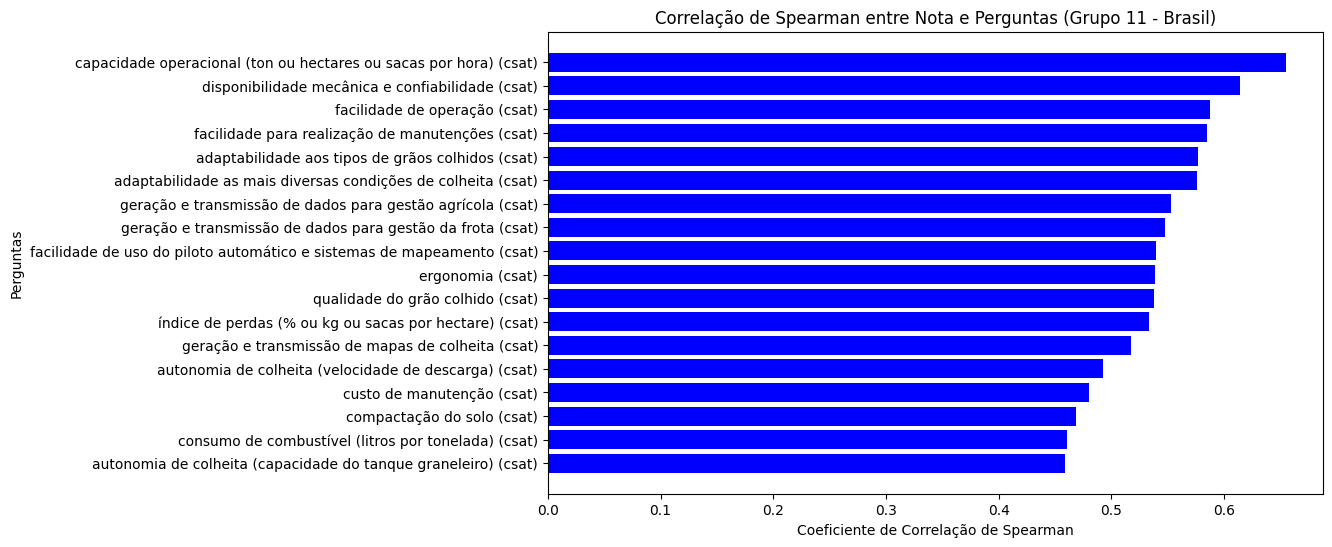

In [ ]:
import matplotlib.pyplot as plt

# Preparar dados para o gráfico
variaveis = list(correlacoes_ordenadas.keys())
coeficientes = list(correlacoes_ordenadas.values())

# Definir cores com base na força da correlação
cores = ['red' if abs(c) >= 0.7 else 'blue' if abs(c) >= 0.3 else 'green' for c in coeficientes]

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(variaveis, coeficientes, color=cores)
plt.xlabel("Coeficiente de Correlação de Spearman")
plt.ylabel("Perguntas")
plt.title("Correlação de Spearman entre Nota e Perguntas (Grupo 11 - Brasil)")
plt.gca().invert_yaxis()  # Inverter o eixo Y para as maiores correlações no topo
plt.show()


In [ ]:
from scipy.stats import spearmanr

def calcular_spearman_por_regiao(df, perguntas, regiao_nome):
    df_regiao = df[df['regiao'] == regiao_nome]

    # Inicializa um dicionário para armazenar os resultados
    correlacoes = {}

    # Itera sobre as perguntas e calcula a correlação de Spearman
    for pergunta in perguntas:
        dados_validos = df_regiao[[pergunta, 'target']].dropna()
        if dados_validos[pergunta].nunique() > 1:
            coef, _ = spearmanr(dados_validos[pergunta], dados_validos['target'])
            correlacoes[pergunta] = coef
        else:
            correlacoes[pergunta] = float('nan')  # Marca como NaN se não puder calcular

    return correlacoes

# Lista de perguntas
perguntas = [
    'facilidade de operação (csat)',
    'facilidade para realização de manutenções (csat)',
    'custo de manutenção (csat)',
    'geração e transmissão de dados para gestão da frota (csat)',
    'geração e transmissão de dados para gestão agrícola (csat)',
    'autonomia de colheita (capacidade do tanque graneleiro) (csat)',
    'autonomia de colheita (velocidade de descarga) (csat)',
    'ergonomia (csat)',
    'adaptabilidade as mais diversas condições de colheita (csat)',
    'facilidade de uso do piloto automático e sistemas de mapeamento (csat)',
    'geração e transmissão de mapas de colheita (csat)',
    'capacidade operacional (ton ou hectares ou sacas por hora) (csat)',
    'índice de perdas (% ou kg ou sacas por hectare) (csat)',
    'qualidade do grão colhido (csat)',
    'compactação do solo (csat)',
    'disponibilidade mecânica e confiabilidade (csat)',
    'consumo de combustível (litros por tonelada) (csat)',
    'adaptabilidade aos tipos de grãos colhidos (csat)'
]

# Lista de regiões
regioes_nomes = ['Sul', 'Nordeste', 'Norte', 'Centro-Oeste', 'Sudeste', 'Não Mapeado']

# DataFrame para armazenar os resultados
resultados = pd.DataFrame()

# Calcula Spearman para cada região
for regiao in regioes_nomes:
    correlacoes = calcular_spearman_por_regiao(df_brasil_grupo11, perguntas, regiao)
    correlacoes_df = pd.DataFrame.from_dict(correlacoes, orient='index', columns=['Spearman'])
    correlacoes_df['Região'] = regiao
    resultados = pd.concat([resultados, correlacoes_df])

# Reseta o índice para organizar o DataFrame
resultados.reset_index(inplace=True)
resultados.rename(columns={'index': 'Pergunta'}, inplace=True)

# Exibe o DataFrame final
print(resultados)


<ipython-input-21-e70be4c77e5e>:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coef, _ = spearmanr(dados_validos[pergunta], dados_validos['target'])


                                              Pergunta  Spearman       Região
0                        facilidade de operação (csat)  0.533758          Sul
1     facilidade para realização de manutenções (csat)  0.564089          Sul
2                           custo de manutenção (csat)  0.460066          Sul
3    geração e transmissão de dados para gestão da ...  0.505611          Sul
4    geração e transmissão de dados para gestão agr...  0.520037          Sul
..                                                 ...       ...          ...
103                   qualidade do grão colhido (csat)  0.529125  Não Mapeado
104                         compactação do solo (csat)  0.327711  Não Mapeado
105   disponibilidade mecânica e confiabilidade (csat)  0.560867  Não Mapeado
106  consumo de combustível (litros por tonelada) (...  0.374607  Não Mapeado
107  adaptabilidade aos tipos de grãos colhidos (csat)  0.504716  Não Mapeado

[108 rows x 3 columns]


In [ ]:
# Função para exibir tabelas estilizadas separadamente por região
def exibir_tabelas_por_regiao(resultados):
    regioes = resultados['Região'].unique()
    for regiao in regioes:
        # Filtra os resultados para a região atual
        resultados_regiao = resultados[resultados['Região'] == regiao]

        # Estiliza a tabela para a região atual
        tabela_estilizada = resultados_regiao.style.background_gradient(cmap='coolwarm', subset=['Spearman']) \
                                             .set_caption(f"Correlação de Spearman - Região {regiao}") \
                                             .set_table_styles([
                                                 {'selector': 'th', 'props': [('text-align', 'center')]},
                                                 {'selector': 'td', 'props': [('text-align', 'center')]}
                                             ])
        # Exibe a tabela estilizada
        display(tabela_estilizada)

# Chama a função para exibir as tabelas
exibir_tabelas_por_regiao(resultados)


,Pergunta,Spearman,Região
0,facilidade de operação (csat),0.533758,Sul
1,facilidade para realização de manutenções (csat),0.564089,Sul
2,custo de manutenção (csat),0.460066,Sul
3,geração e transmissão de dados para gestão da frota (csat),0.505611,Sul
4,geração e transmissão de dados para gestão agrícola (csat),0.520037,Sul
5,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.392502,Sul
6,autonomia de colheita (velocidade de descarga) (csat),0.404403,Sul
7,ergonomia (csat),0.487550,Sul
8,adaptabilidade as mais diversas condições de colheita (csat),0.558851,Sul
9,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.483491,Sul


,Pergunta,Spearman,Região
18,facilidade de operação (csat),0.090825,Nordeste
19,facilidade para realização de manutenções (csat),0.209241,Nordeste
20,custo de manutenção (csat),-0.181550,Nordeste
21,geração e transmissão de dados para gestão da frota (csat),0.186704,Nordeste
22,geração e transmissão de dados para gestão agrícola (csat),0.737210,Nordeste
23,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.117851,Nordeste
24,autonomia de colheita (velocidade de descarga) (csat),0.023749,Nordeste
25,ergonomia (csat),0.438634,Nordeste
26,adaptabilidade as mais diversas condições de colheita (csat),0.700174,Nordeste
27,facilidade de uso do piloto automático e sistemas de mapeamento (csat),nan,Nordeste


,Pergunta,Spearman,Região
36,facilidade de operação (csat),0.405138,Norte
37,facilidade para realização de manutenções (csat),0.407997,Norte
38,custo de manutenção (csat),0.577104,Norte
39,geração e transmissão de dados para gestão da frota (csat),0.468573,Norte
40,geração e transmissão de dados para gestão agrícola (csat),0.326481,Norte
41,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.525255,Norte
42,autonomia de colheita (velocidade de descarga) (csat),0.347088,Norte
43,ergonomia (csat),0.437154,Norte
44,adaptabilidade as mais diversas condições de colheita (csat),0.451455,Norte
45,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.395416,Norte


,Pergunta,Spearman,Região
54,facilidade de operação (csat),0.647955,Centro-Oeste
55,facilidade para realização de manutenções (csat),0.603963,Centro-Oeste
56,custo de manutenção (csat),0.525208,Centro-Oeste
57,geração e transmissão de dados para gestão da frota (csat),0.551437,Centro-Oeste
58,geração e transmissão de dados para gestão agrícola (csat),0.544246,Centro-Oeste
59,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.449554,Centro-Oeste
60,autonomia de colheita (velocidade de descarga) (csat),0.489814,Centro-Oeste
61,ergonomia (csat),0.537480,Centro-Oeste
62,adaptabilidade as mais diversas condições de colheita (csat),0.527076,Centro-Oeste
63,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.486781,Centro-Oeste


,Pergunta,Spearman,Região
72,facilidade de operação (csat),0.502926,Sudeste
73,facilidade para realização de manutenções (csat),0.535451,Sudeste
74,custo de manutenção (csat),0.441343,Sudeste
75,geração e transmissão de dados para gestão da frota (csat),0.514325,Sudeste
76,geração e transmissão de dados para gestão agrícola (csat),0.522956,Sudeste
77,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.434859,Sudeste
78,autonomia de colheita (velocidade de descarga) (csat),0.487910,Sudeste
79,ergonomia (csat),0.512390,Sudeste
80,adaptabilidade as mais diversas condições de colheita (csat),0.509808,Sudeste
81,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.587451,Sudeste


,Pergunta,Spearman,Região
90,facilidade de operação (csat),0.595697,Não Mapeado
91,facilidade para realização de manutenções (csat),0.406767,Não Mapeado
92,custo de manutenção (csat),0.387123,Não Mapeado
93,geração e transmissão de dados para gestão da frota (csat),0.535451,Não Mapeado
94,geração e transmissão de dados para gestão agrícola (csat),0.447287,Não Mapeado
95,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.349881,Não Mapeado
96,autonomia de colheita (velocidade de descarga) (csat),0.395235,Não Mapeado
97,ergonomia (csat),0.304531,Não Mapeado
98,adaptabilidade as mais diversas condições de colheita (csat),0.496554,Não Mapeado
99,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.466821,Não Mapeado


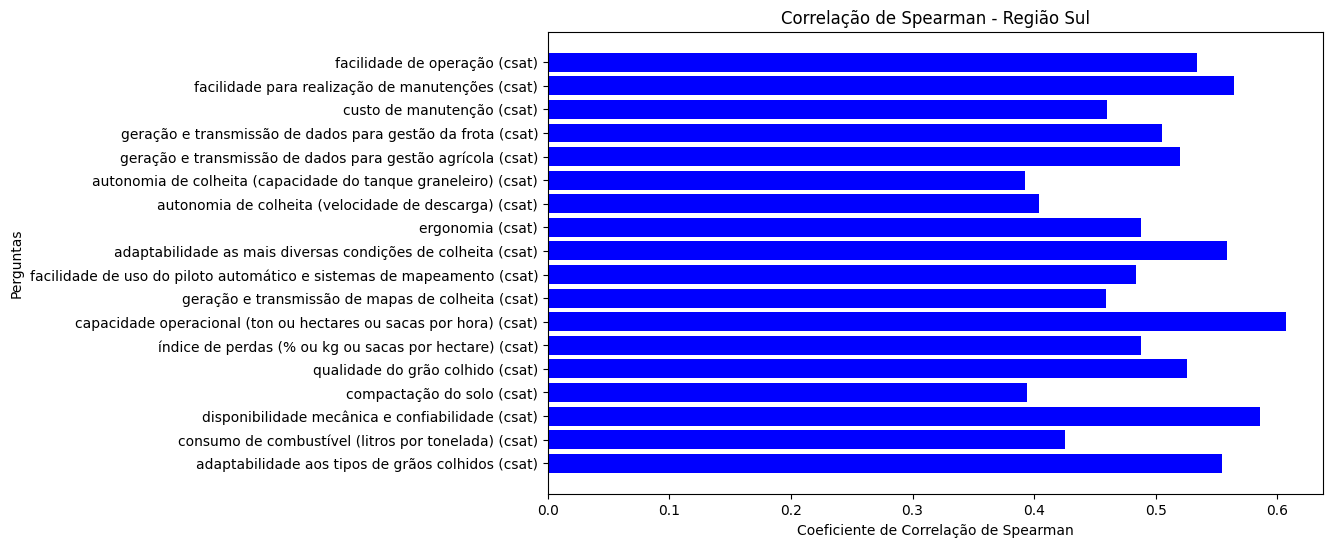

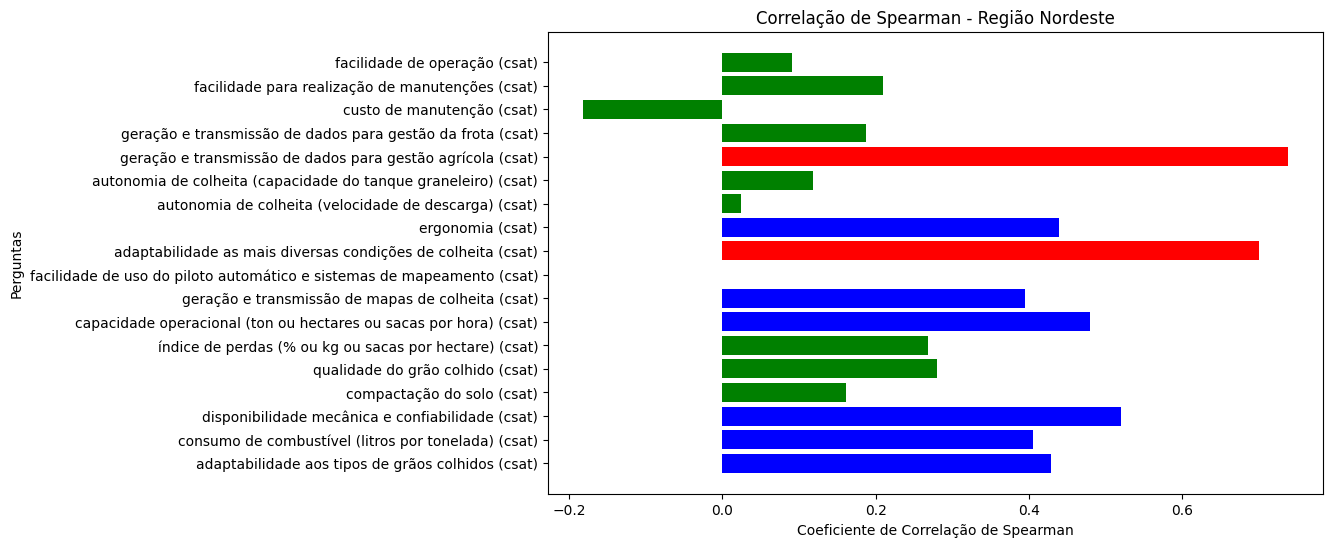

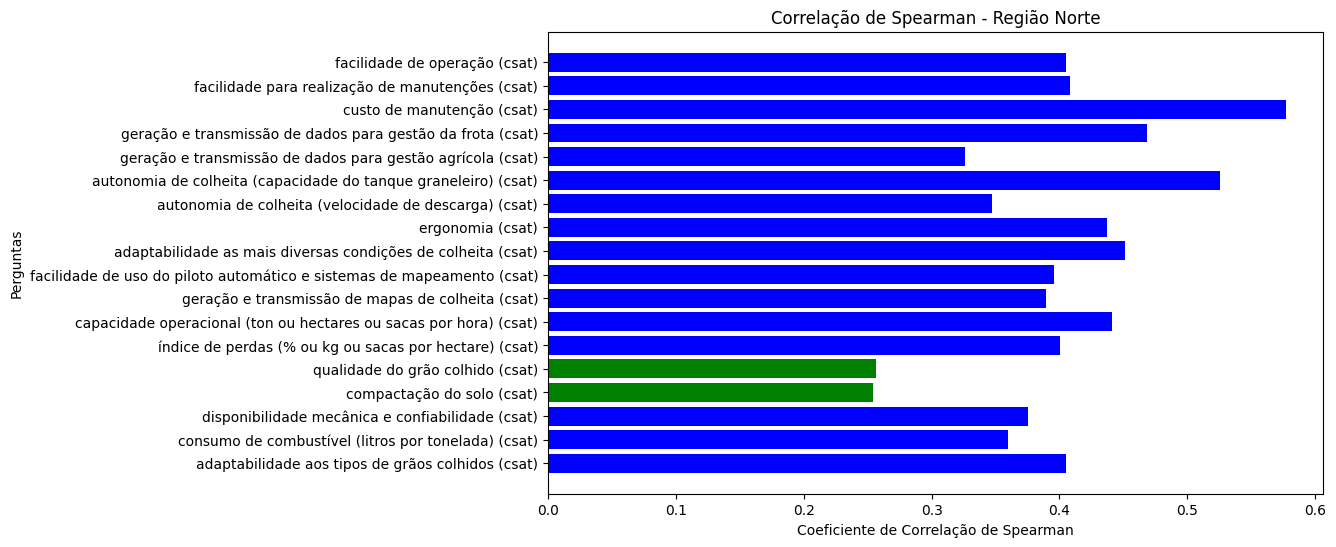

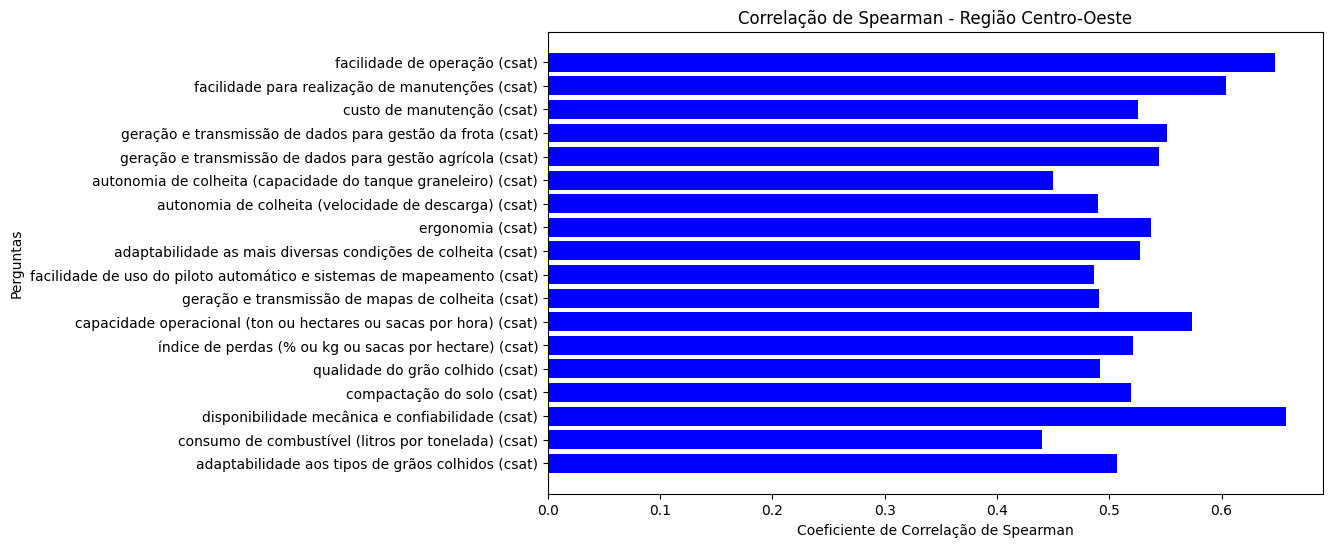

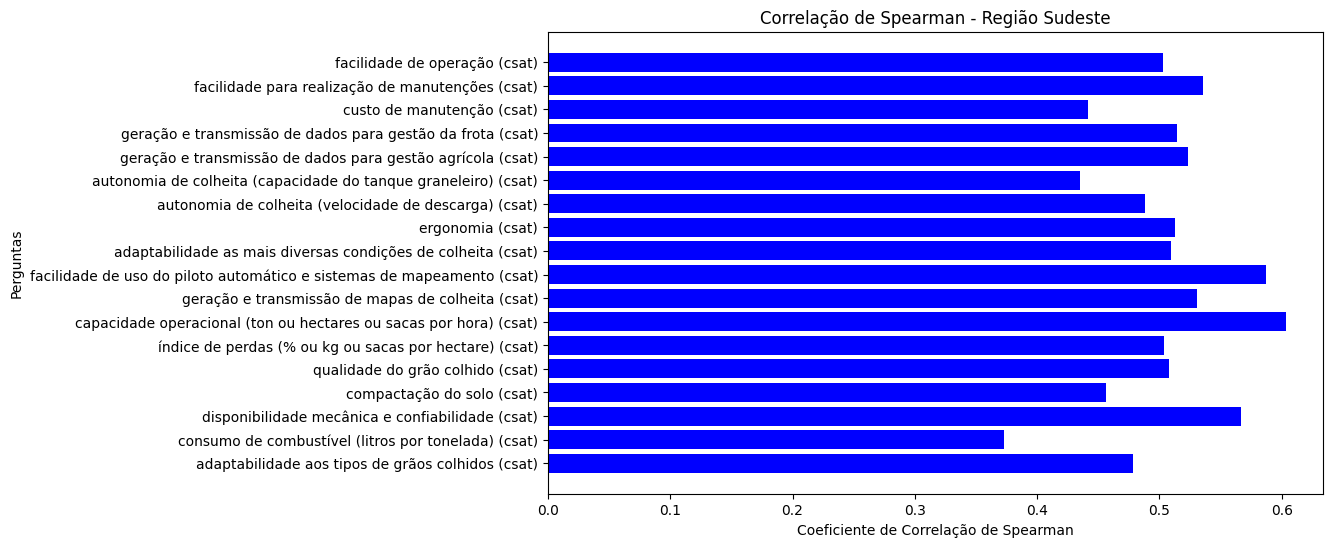

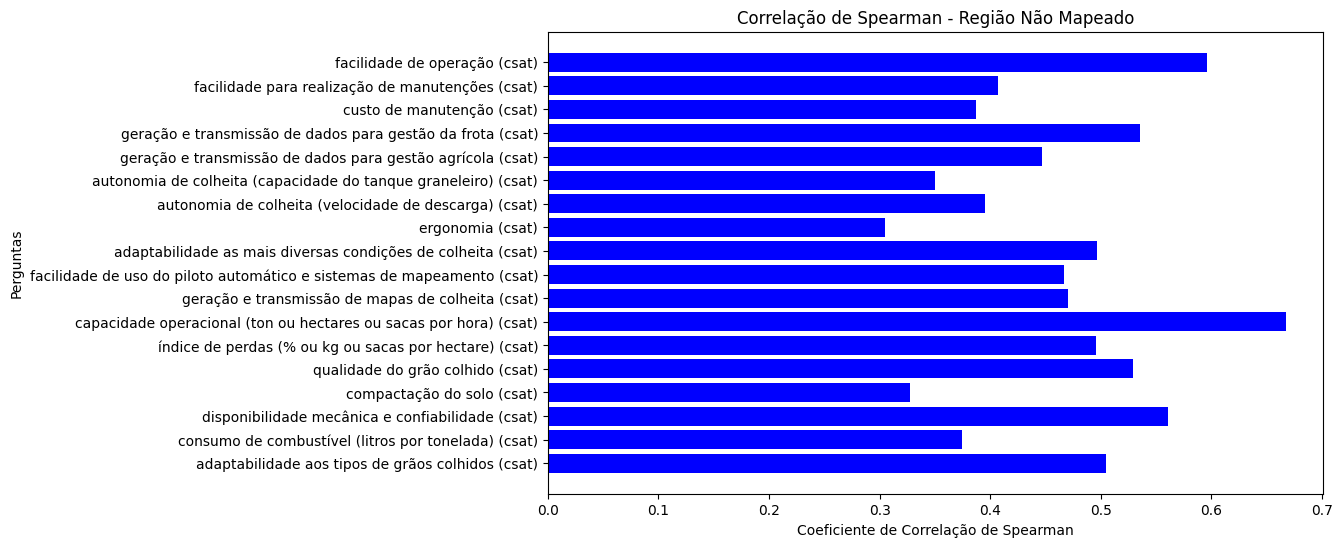

In [ ]:
import matplotlib.pyplot as plt

# Função para criar gráficos de correlação por região
def gerar_graficos_por_regiao(resultados):
    regioes = resultados['Região'].unique()

    for regiao in regioes:
        # Filtra os resultados para a região atual
        resultados_regiao = resultados[resultados['Região'] == regiao]

        # Extrai as variáveis e os coeficientes
        variaveis = resultados_regiao['Pergunta']
        coeficientes = resultados_regiao['Spearman']

        # Define as cores com base na força da correlação
        cores = ['red' if abs(c) >= 0.7 else 'blue' if abs(c) >= 0.3 else 'green' for c in coeficientes]

        # Criar o gráfico de barras horizontais
        plt.figure(figsize=(10, 6))
        plt.barh(variaveis, coeficientes, color=cores)
        plt.xlabel("Coeficiente de Correlação de Spearman")
        plt.ylabel("Perguntas")
        plt.title(f"Correlação de Spearman - Região {regiao}")
        plt.gca().invert_yaxis()  # Inverter o eixo Y para as maiores correlações no topo

        # Exibir o gráfico
        plt.show()

# Chamar a função para gerar gráficos por região
gerar_graficos_por_regiao(resultados)


In [ ]:
from scipy.stats import spearmanr

# Função para calcular a correlação de Spearman por período de pesquisa
def calcular_spearman_por_periodo(df, perguntas, periodo_nome):
    df_periodo = df[df['Periodo de Pesquisa'] == periodo_nome]

    # Inicializa um dicionário para armazenar os resultados
    correlacoes = {}

    # Itera sobre as perguntas e calcula a correlação de Spearman
    for pergunta in perguntas:
        dados_validos = df_periodo[[pergunta, 'target']].dropna()
        if dados_validos[pergunta].nunique() > 1:  # Verifica se há mais de um valor único
            coef, _ = spearmanr(dados_validos[pergunta], dados_validos['target'])
            correlacoes[pergunta] = coef
        else:
            correlacoes[pergunta] = float('nan')  # Marca como NaN se não puder calcular

    return correlacoes

# Lista de perguntas
perguntas = [
    'facilidade de operação (csat)',
    'facilidade para realização de manutenções (csat)',
    'custo de manutenção (csat)',
    'geração e transmissão de dados para gestão da frota (csat)',
    'geração e transmissão de dados para gestão agrícola (csat)',
    'autonomia de colheita (capacidade do tanque graneleiro) (csat)',
    'autonomia de colheita (velocidade de descarga) (csat)',
    'ergonomia (csat)',
    'adaptabilidade as mais diversas condições de colheita (csat)',
    'facilidade de uso do piloto automático e sistemas de mapeamento (csat)',
    'geração e transmissão de mapas de colheita (csat)',
    'capacidade operacional (ton ou hectares ou sacas por hora) (csat)',
    'índice de perdas (% ou kg ou sacas por hectare) (csat)',
    'qualidade do grão colhido (csat)',
    'compactação do solo (csat)',
    'disponibilidade mecânica e confiabilidade (csat)',
    'consumo de combustível (litros por tonelada) (csat)',
    'adaptabilidade aos tipos de grãos colhidos (csat)'
]

# Lista de períodos de pesquisa
periodos_nomes = ['3 a 6 Meses', '6 a 12 Meses', '12 a 18 Meses', '18 a 30 Meses']

# DataFrame para armazenar os resultados
resultados = pd.DataFrame()

# Calcula Spearman para cada período
for periodo in periodos_nomes:
    correlacoes = calcular_spearman_por_periodo(df_brasil_grupo11, perguntas, periodo)
    correlacoes_df = pd.DataFrame.from_dict(correlacoes, orient='index', columns=['Spearman'])
    correlacoes_df['Período de Pesquisa'] = periodo
    resultados = pd.concat([resultados, correlacoes_df])

# Reseta o índice para organizar o DataFrame
resultados.reset_index(inplace=True)
resultados.rename(columns={'index': 'Pergunta'}, inplace=True)

# Exibe o DataFrame final
print(resultados)


                                             Pergunta  Spearman  \
0                       facilidade de operação (csat)  0.541448   
1    facilidade para realização de manutenções (csat)  0.580547   
2                          custo de manutenção (csat)  0.437448   
3   geração e transmissão de dados para gestão da ...  0.504882   
4   geração e transmissão de dados para gestão agr...  0.531337   
..                                                ...       ...   
67                   qualidade do grão colhido (csat)  0.569641   
68                         compactação do solo (csat)  0.414091   
69   disponibilidade mecânica e confiabilidade (csat)  0.571881   
70  consumo de combustível (litros por tonelada) (...  0.468231   
71  adaptabilidade aos tipos de grãos colhidos (csat)  0.558373   

   Período de Pesquisa  
0          3 a 6 Meses  
1          3 a 6 Meses  
2          3 a 6 Meses  
3          3 a 6 Meses  
4          3 a 6 Meses  
..                 ...  
67       18 a 30 Mes

In [ ]:
import pandas as pd

# Função para exibir tabelas estilizadas separadamente por período de pesquisa
def exibir_tabelas_por_periodo(resultados):
    periodos = resultados['Período de Pesquisa'].unique()
    for periodo in periodos:
        # Filtra os resultados para o período atual
        resultados_periodo = resultados[resultados['Período de Pesquisa'] == periodo]

        # Estiliza a tabela para o período atual
        tabela_estilizada = resultados_periodo.style.background_gradient(cmap='coolwarm', subset=['Spearman']) \
                                                .set_caption(f"Correlação de Spearman - Período de Pesquisa: {periodo}") \
                                                .set_table_styles([{
                                                    'selector': 'th', 'props': [('text-align', 'center')]
                                                }, {
                                                    'selector': 'td', 'props': [('text-align', 'center')]
                                                }])
        # Exibe a tabela estilizada
        display(tabela_estilizada)

# Chama a função para exibir as tabelas
exibir_tabelas_por_periodo(resultados)


,Pergunta,Spearman,Período de Pesquisa
0,facilidade de operação (csat),0.541448,3 a 6 Meses
1,facilidade para realização de manutenções (csat),0.580547,3 a 6 Meses
2,custo de manutenção (csat),0.437448,3 a 6 Meses
3,geração e transmissão de dados para gestão da frota (csat),0.504882,3 a 6 Meses
4,geração e transmissão de dados para gestão agrícola (csat),0.531337,3 a 6 Meses
5,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.417476,3 a 6 Meses
6,autonomia de colheita (velocidade de descarga) (csat),0.395708,3 a 6 Meses
7,ergonomia (csat),0.471137,3 a 6 Meses
8,adaptabilidade as mais diversas condições de colheita (csat),0.502570,3 a 6 Meses
9,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.508134,3 a 6 Meses


,Pergunta,Spearman,Período de Pesquisa
18,facilidade de operação (csat),0.475943,6 a 12 Meses
19,facilidade para realização de manutenções (csat),0.543367,6 a 12 Meses
20,custo de manutenção (csat),0.495014,6 a 12 Meses
21,geração e transmissão de dados para gestão da frota (csat),0.518170,6 a 12 Meses
22,geração e transmissão de dados para gestão agrícola (csat),0.485287,6 a 12 Meses
23,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.503913,6 a 12 Meses
24,autonomia de colheita (velocidade de descarga) (csat),0.459059,6 a 12 Meses
25,ergonomia (csat),0.493830,6 a 12 Meses
26,adaptabilidade as mais diversas condições de colheita (csat),0.556933,6 a 12 Meses
27,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.524759,6 a 12 Meses


,Pergunta,Spearman,Período de Pesquisa
36,facilidade de operação (csat),0.508116,12 a 18 Meses
37,facilidade para realização de manutenções (csat),0.494581,12 a 18 Meses
38,custo de manutenção (csat),0.474699,12 a 18 Meses
39,geração e transmissão de dados para gestão da frota (csat),0.480857,12 a 18 Meses
40,geração e transmissão de dados para gestão agrícola (csat),0.485476,12 a 18 Meses
41,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.291921,12 a 18 Meses
42,autonomia de colheita (velocidade de descarga) (csat),0.378090,12 a 18 Meses
43,ergonomia (csat),0.466585,12 a 18 Meses
44,adaptabilidade as mais diversas condições de colheita (csat),0.498802,12 a 18 Meses
45,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.436571,12 a 18 Meses


,Pergunta,Spearman,Período de Pesquisa
54,facilidade de operação (csat),0.591683,18 a 30 Meses
55,facilidade para realização de manutenções (csat),0.548301,18 a 30 Meses
56,custo de manutenção (csat),0.422899,18 a 30 Meses
57,geração e transmissão de dados para gestão da frota (csat),0.535559,18 a 30 Meses
58,geração e transmissão de dados para gestão agrícola (csat),0.541586,18 a 30 Meses
59,autonomia de colheita (capacidade do tanque graneleiro) (csat),0.398738,18 a 30 Meses
60,autonomia de colheita (velocidade de descarga) (csat),0.436113,18 a 30 Meses
61,ergonomia (csat),0.493960,18 a 30 Meses
62,adaptabilidade as mais diversas condições de colheita (csat),0.570117,18 a 30 Meses
63,facilidade de uso do piloto automático e sistemas de mapeamento (csat),0.527851,18 a 30 Meses


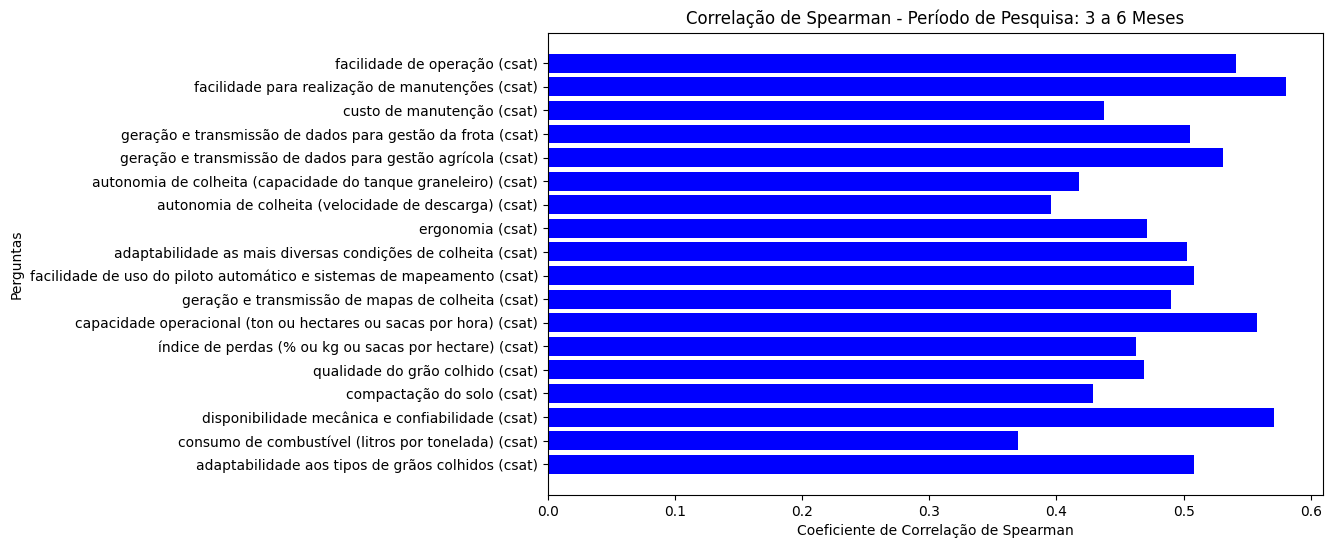

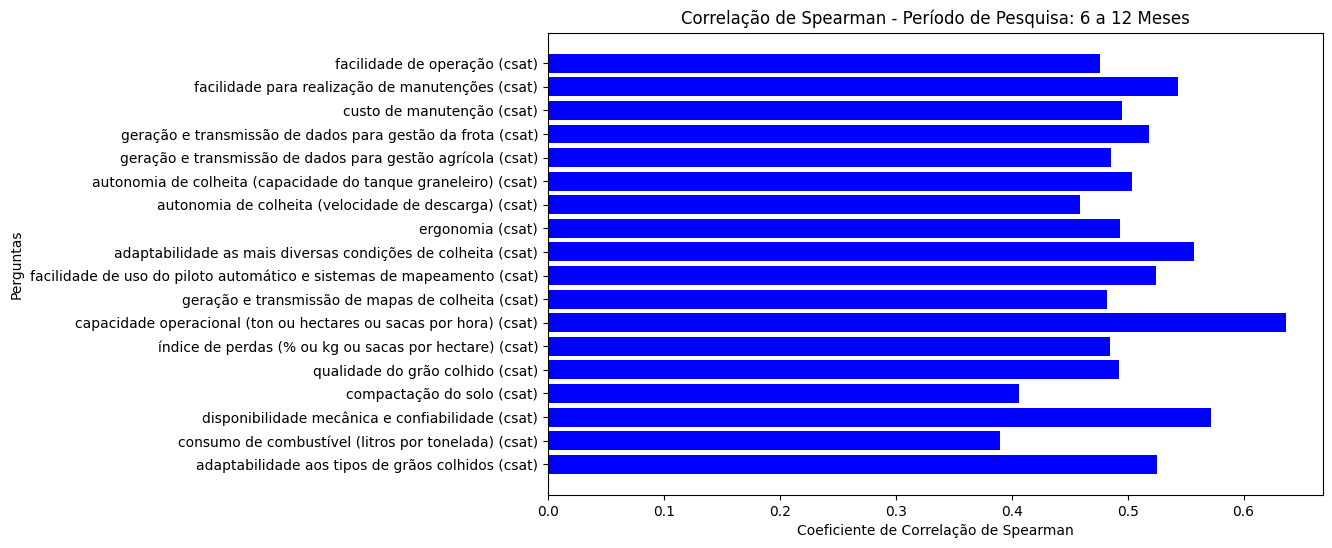

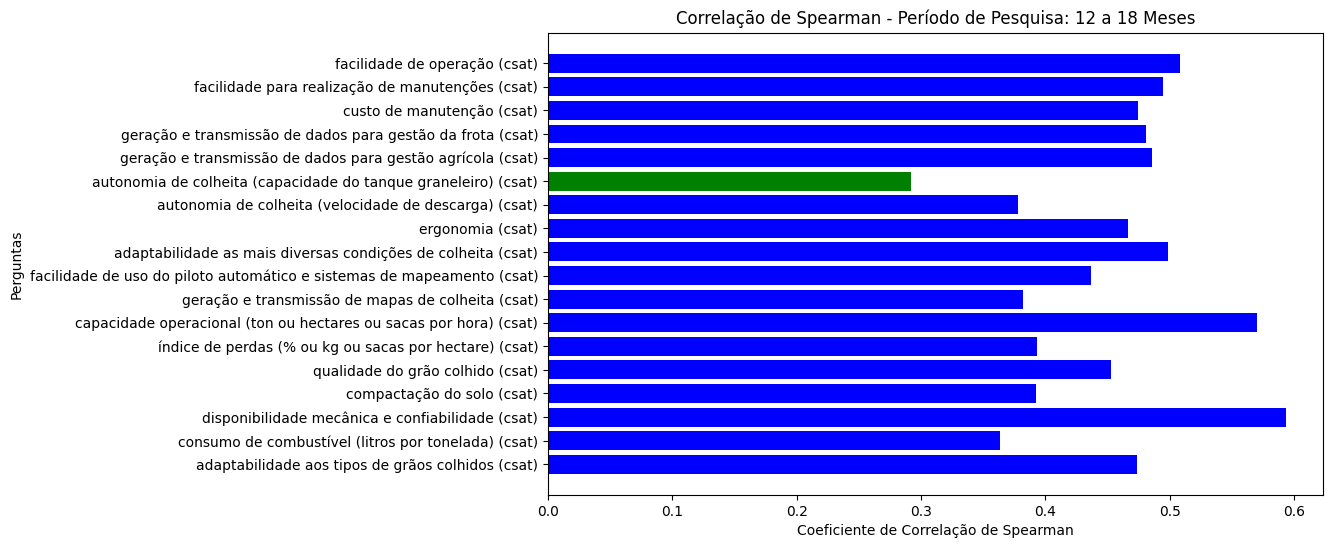

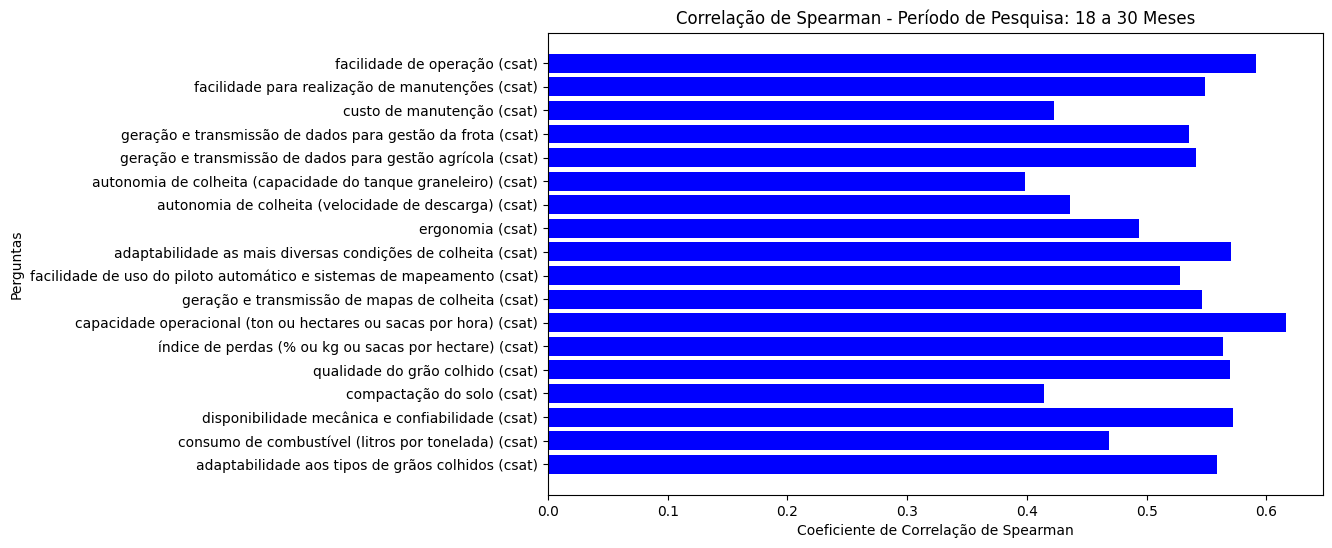

In [ ]:
import matplotlib.pyplot as plt

# Função para criar gráficos de correlação por período de pesquisa
def gerar_graficos_por_periodo(resultados):
    periodos = resultados['Período de Pesquisa'].unique()

    for periodo in periodos:
        # Filtra os resultados para o período atual
        resultados_periodo = resultados[resultados['Período de Pesquisa'] == periodo]

        # Extrai as variáveis e os coeficientes
        variaveis = resultados_periodo['Pergunta']
        coeficientes = resultados_periodo['Spearman']

        # Define as cores com base na força da correlação
        cores = ['red' if abs(c) >= 0.7 else 'blue' if abs(c) >= 0.3 else 'green' for c in coeficientes]

        # Criar o gráfico de barras horizontais
        plt.figure(figsize=(10, 6))
        plt.barh(variaveis, coeficientes, color=cores)
        plt.xlabel("Coeficiente de Correlação de Spearman")
        plt.ylabel("Perguntas")
        plt.title(f"Correlação de Spearman - Período de Pesquisa: {periodo}")
        plt.gca().invert_yaxis()  # Inverter o eixo Y para as maiores correlações no topo

        # Exibir o gráfico
        plt.show()

# Chamar a função para gerar gráficos por período de pesquisa
gerar_graficos_por_periodo(resultados)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Selecione as colunas de perguntas
perguntas = [
    "facilidade de operação (csat)",
    "facilidade para realização de manutenções (csat)",
    "custo de manutenção (csat)",
    "geração e transmissão de dados para gestão da frota (csat)",
    "geração e transmissão de dados para gestão agrícola (csat)",
    "autonomia de colheita (capacidade do tanque graneleiro) (csat)",
    "autonomia de colheita (velocidade de descarga) (csat)",
    "ergonomia (csat)",
    "adaptabilidade as mais diversas condições de colheita (csat)",
    "facilidade de uso do piloto automático e sistemas de mapeamento (csat)",
    "geração e transmissão de mapas de colheita (csat)",
    "capacidade operacional (ton ou hectares ou sacas por hora) (csat)",
    "índice de perdas (% ou kg ou sacas por hectare) (csat)",
    "qualidade do grão colhido (csat)",
    "compactação do solo (csat)",
    "disponibilidade mecânica e confiabilidade (csat)",
    "consumo de combustível (litros por tonelada) (csat)",
    "adaptabilidade aos tipos de grãos colhidos (csat)"
]

# Criar a cópia do DataFrame
df_copia = df_brasil_grupo11.copy()

# 1. Converter 'target' para as classes binárias de Detratores e Neutros na cópia
df_copia['target_detrator'] = df_copia['target'].apply(lambda x: 1 if x == 'detrator' else 0)
df_copia['target_neutro'] = df_copia['target'].apply(lambda x: 1 if x == 'neutro' else 0)

# 2. Separar os dados de entrada (X) e target para cada modelo
X = df_copia[perguntas]

# 3. Modelo de Detratores
y_detrator = df_copia['target_detrator']
X_train_detrator, X_test_detrator, y_train_detrator, y_test_detrator = train_test_split(X, y_detrator, test_size=0.3, random_state=42)

# Treinando o modelo de Detratores com RandomForestClassifier
modelo_detrator = RandomForestClassifier(random_state=42)
modelo_detrator.fit(X_train_detrator, y_train_detrator)

# Prevendo os resultados
y_pred_detrator = modelo_detrator.predict(X_test_detrator)

# 4. Modelo de Neutros
y_neutro = df_copia['target_neutro']
X_train_neutro, X_test_neutro, y_train_neutro, y_test_neutro = train_test_split(X, y_neutro, test_size=0.3, random_state=42)

# Treinando o modelo de Neutros com RandomForestClassifier
modelo_neutro = RandomForestClassifier(random_state=42)
modelo_neutro.fit(X_train_neutro, y_train_neutro)

# Prevendo os resultados
y_pred_neutro = modelo_neutro.predict(X_test_neutro)

# 5. Avaliar AUC-ROC para ambos os modelos

# AUC-ROC para Detratores
y_pred_proba_detrator = modelo_detrator.predict_proba(X_test_detrator)[:, 1]
auc_detrator = roc_auc_score(y_test_detrator, y_pred_proba_detrator)
print(f"AUC-ROC para Detratores: {auc_detrator:.2f}")

# AUC-ROC para Neutros
y_pred_proba_neutro = modelo_neutro.predict_proba(X_test_neutro)[:, 1]
auc_neutro = roc_auc_score(y_test_neutro, y_pred_proba_neutro)
print(f"AUC-ROC para Neutros: {auc_neutro:.2f}")

# 6. Função para exibir as top N variáveis mais importantes
def top_n_importantes(modelo, X, n=10):
    importancias = modelo.feature_importances_
    indices = importancias.argsort()[-n:][::-1]
    return X.columns[indices], importancias[indices]

# 7. Top 10 variáveis mais importantes para Detratores
top_detrator, importancias_detrator = top_n_importantes(modelo_detrator, X, n=10)

# 8. Top 10 variáveis mais importantes para Neutros
top_neutro, importancias_neutro = top_n_importantes(modelo_neutro, X, n=10)

# 9. Relatório de Top 10 variáveis
print("\nTop 10 Variáveis para o Modelo de Detratores:")
for i, var in enumerate(top_detrator):
    print(f"{i+1}. {var} - Importância: {importancias_detrator[i]:.4f}")

print("\nTop 10 Variáveis para o Modelo de Neutros:")
for i, var in enumerate(top_neutro):
    print(f"{i+1}. {var} - Importância: {importancias_neutro[i]:.4f}")


AUC-ROC para Detratores: 0.87
AUC-ROC para Neutros: 0.74

Top 10 Variáveis para o Modelo de Detratores:
1. capacidade operacional (ton ou hectares ou sacas por hora) (csat) - Importância: 0.1706
2. disponibilidade mecânica e confiabilidade (csat) - Importância: 0.1670
3. facilidade para realização de manutenções (csat) - Importância: 0.0739
4. adaptabilidade as mais diversas condições de colheita (csat) - Importância: 0.0656
5. adaptabilidade aos tipos de grãos colhidos (csat) - Importância: 0.0636
6. facilidade de operação (csat) - Importância: 0.0618
7. índice de perdas (% ou kg ou sacas por hectare) (csat) - Importância: 0.0613
8. qualidade do grão colhido (csat) - Importância: 0.0600
9. autonomia de colheita (capacidade do tanque graneleiro) (csat) - Importância: 0.0427
10. ergonomia (csat) - Importância: 0.0327

Top 10 Variáveis para o Modelo de Neutros:
1. capacidade operacional (ton ou hectares ou sacas por hora) (csat) - Importância: 0.0856
2. índice de perdas (% ou kg ou sacas

In [ ]:


# Selecione as colunas de perguntas
perguntas = [
    "facilidade de operação (csat)",
    "facilidade para realização de manutenções (csat)",
    "custo de manutenção (csat)",
    "geração e transmissão de dados para gestão da frota (csat)",
    "geração e transmissão de dados para gestão agrícola (csat)",
    "autonomia de colheita (capacidade do tanque graneleiro) (csat)",
    "autonomia de colheita (velocidade de descarga) (csat)",
    "ergonomia (csat)",
    "adaptabilidade as mais diversas condições de colheita (csat)",
    "facilidade de uso do piloto automático e sistemas de mapeamento (csat)",
    "geração e transmissão de mapas de colheita (csat)",
    "capacidade operacional (ton ou hectares ou sacas por hora) (csat)",
    "índice de perdas (% ou kg ou sacas por hectare) (csat)",
    "qualidade do grão colhido (csat)",
    "compactação do solo (csat)",
    "disponibilidade mecânica e confiabilidade (csat)",
    "consumo de combustível (litros por tonelada) (csat)",
    "adaptabilidade aos tipos de grãos colhidos (csat)"
]

# Criar a cópia do DataFrame
df_copia = df_brasil_grupo11.copy()

# 1. Converter 'target' para as classes binárias de Detratores e Neutros na cópia
df_copia['target_detrator'] = df_copia['target'].apply(lambda x: 1 if x == 'detrator' else 0)
df_copia['target_neutro'] = df_copia['target'].apply(lambda x: 1 if x == 'neutro' else 0)

# 2. Separar os dados de entrada (X) e target para cada modelo
X = df_copia[perguntas]

# Função para realizar a análise binária por região
def analise_binaria_por_regiao(df, regioes, perguntas):
    for regiao in regioes:
        # Filtra os dados pela região
        df_regiao = df[df['regiao'] == regiao]

        # Verificar se há dados suficientes para análise
        if len(df_regiao) > 0:
            print(f"\nAnalisando região: {regiao}")

            # Separar as variáveis de entrada (X) e o alvo (target)
            X_regiao = df_regiao[perguntas]
            y_detrator_regiao = df_regiao['target_detrator']
            y_neutro_regiao = df_regiao['target_neutro']

            # 3. Modelo de Detratores
            X_train_detrator, X_test_detrator, y_train_detrator, y_test_detrator = train_test_split(X_regiao, y_detrator_regiao, test_size=0.3, random_state=42)

            # Treinando o modelo de Detratores com RandomForestClassifier
            modelo_detrator_regiao = RandomForestClassifier(random_state=42)
            modelo_detrator_regiao.fit(X_train_detrator, y_train_detrator)

            # Prevendo os resultados
            y_pred_detrator_regiao = modelo_detrator_regiao.predict(X_test_detrator)

            # 4. Modelo de Neutros
            X_train_neutro, X_test_neutro, y_train_neutro, y_test_neutro = train_test_split(X_regiao, y_neutro_regiao, test_size=0.3, random_state=42)

            # Treinando o modelo de Neutros com RandomForestClassifier
            modelo_neutro_regiao = RandomForestClassifier(random_state=42)
            modelo_neutro_regiao.fit(X_train_neutro, y_train_neutro)

            # Prevendo os resultados
            y_pred_neutro_regiao = modelo_neutro_regiao.predict(X_test_neutro)

            # 5. Avaliar AUC-ROC para ambos os modelos

            # AUC-ROC para Detratores
            y_pred_proba_detrator_regiao = modelo_detrator_regiao.predict_proba(X_test_detrator)[:, 1]
            auc_detrator_regiao = roc_auc_score(y_test_detrator, y_pred_proba_detrator_regiao)
            print(f"AUC-ROC para Detratores na região {regiao}: {auc_detrator_regiao:.2f}")

            # AUC-ROC para Neutros
            y_pred_proba_neutro_regiao = modelo_neutro_regiao.predict_proba(X_test_neutro)[:, 1]
            auc_neutro_regiao = roc_auc_score(y_test_neutro, y_pred_proba_neutro_regiao)
            print(f"AUC-ROC para Neutros na região {regiao}: {auc_neutro_regiao:.2f}")

            # 6. Função para exibir as top N variáveis mais importantes
            def top_n_importantes(modelo, X, n=10):
                importancias = modelo.feature_importances_
                indices = importancias.argsort()[-n:][::-1]
                return X.columns[indices], importancias[indices]

            # 7. Top 10 variáveis mais importantes para Detratores
            top_detrator_regiao, importancias_detrator_regiao = top_n_importantes(modelo_detrator_regiao, X_regiao, n=10)

            # 8. Top 10 variáveis mais importantes para Neutros
            top_neutro_regiao, importancias_neutro_regiao = top_n_importantes(modelo_neutro_regiao, X_regiao, n=10)

            # 9. Relatório de Top 10 variáveis
            print("\nTop 10 Variáveis para o Modelo de Detratores na região {regiao}:")
            for i, var in enumerate(top_detrator_regiao):
                print(f"{i+1}. {var} - Importância: {importancias_detrator_regiao[i]:.4f}")

            print("\nTop 10 Variáveis para o Modelo de Neutros na região {regiao}:")
            for i, var in enumerate(top_neutro_regiao):
                print(f"{i+1}. {var} - Importância: {importancias_neutro_regiao[i]:.4f}")
        else:
            print(f"Sem dados suficientes para a região {regiao}.")


# Exemplo de chamadas para a função
regioes = df_copia['regiao'].unique()  # Supondo que a coluna 'regiao' existe no seu DataFrame
analise_binaria_por_regiao(df_copia, regioes, perguntas)




Analisando região: Centro-Oeste
AUC-ROC para Detratores na região Centro-Oeste: 0.89
AUC-ROC para Neutros na região Centro-Oeste: 0.64

Top 10 Variáveis para o Modelo de Detratores na região {regiao}:
1. capacidade operacional (ton ou hectares ou sacas por hora) (csat) - Importância: 0.2334
2. facilidade para realização de manutenções (csat) - Importância: 0.1120
3. autonomia de colheita (capacidade do tanque graneleiro) (csat) - Importância: 0.1109
4. custo de manutenção (csat) - Importância: 0.0848
5. disponibilidade mecânica e confiabilidade (csat) - Importância: 0.0823
6. índice de perdas (% ou kg ou sacas por hectare) (csat) - Importância: 0.0749
7. facilidade de operação (csat) - Importância: 0.0563
8. adaptabilidade aos tipos de grãos colhidos (csat) - Importância: 0.0431
9. qualidade do grão colhido (csat) - Importância: 0.0334
10. autonomia de colheita (velocidade de descarga) (csat) - Importância: 0.0318

Top 10 Variáveis para o Modelo de Neutros na região {regiao}:
1. dispo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Criar a cópia do DataFrame
df_copia = df_brasil_grupo11.copy()

# Converter 'data_resposta' no formato datetime
df_copia['data_resposta'] = pd.to_datetime(df_copia['data_resposta'], format='%d/%m/%Y %H:%M:%S')

# Função para definir o período de pesquisa
def definir_periodo(data):
    diff = (pd.Timestamp.now() - data).days / 30  # Diferença em meses
    if 3 <= diff <= 6:
        return '3 a 6 M'
    elif 6 < diff <= 12:
        return '6 a 12 M'
    elif 12 < diff <= 18:
        return '12 a 18 M'
    elif 18 < diff <= 30:
        return '18 a 30 M'
    else:
        return 'Outros'

# Adicionar a coluna 'Periodo de Pesquisa' ao DataFrame
df_copia['Periodo de Pesquisa'] = df_copia['data_resposta'].apply(definir_periodo)




# Converter 'target' para as classes binárias de Detratores e Neutros
df_copia['target_detrator'] = df_copia['target'].apply(lambda x: 1 if x == 'detrator' else 0)
df_copia['target_neutro'] = df_copia['target'].apply(lambda x: 1 if x == 'neutro' else 0)

# Selecione as colunas de perguntas
perguntas = [
    "facilidade de operação (csat)",
    "facilidade para realização de manutenções (csat)",
    "custo de manutenção (csat)",
    "geração e transmissão de dados para gestão da frota (csat)",
    "geração e transmissão de dados para gestão agrícola (csat)",
    "autonomia de colheita (capacidade do tanque graneleiro) (csat)",
    "autonomia de colheita (velocidade de descarga) (csat)",
    "ergonomia (csat)",
    "adaptabilidade as mais diversas condições de colheita (csat)",
    "facilidade de uso do piloto automático e sistemas de mapeamento (csat)",
    "geração e transmissão de mapas de colheita (csat)",
    "capacidade operacional (ton ou hectares ou sacas por hora) (csat)",
    "índice de perdas (% ou kg ou sacas por hectare) (csat)",
    "qualidade do grão colhido (csat)",
    "compactação do solo (csat)",
    "disponibilidade mecânica e confiabilidade (csat)",
    "consumo de combustível (litros por tonelada) (csat)",
    "adaptabilidade aos tipos de grãos colhidos (csat)"
]

# Remover registros com valores ausentes nas colunas de perguntas
df_copia = df_copia.dropna(subset=perguntas)

# Função para realizar a análise binária por período de pesquisa
def analise_binaria_por_periodo(df, periodos, perguntas):
    for periodo in periodos:
        # Filtra os dados pelo período de pesquisa
        df_periodo = df[df['Periodo de Pesquisa'] == periodo]

        # Verificar se há dados suficientes para análise
        if len(df_periodo) > 0:
            print(f"\nAnalisando período de pesquisa: {periodo}")

            # Separar as variáveis de entrada (X) e o alvo (target)
            X_periodo = df_periodo[perguntas]
            y_detrator_periodo = df_periodo['target_detrator']
            y_neutro_periodo = df_periodo['target_neutro']

            # Ajustar a proporção de treino e teste para o período 3 a 6 meses
            if periodo == '3 a 6 M':
                test_size = 0.1  # 10% para teste
            else:
                test_size = 0.3  # 30% para teste

            # Modelo de Detratores
            X_train_detrator, X_test_detrator, y_train_detrator, y_test_detrator = train_test_split(X_periodo, y_detrator_periodo, test_size=test_size, random_state=42)

            # Treinando o modelo de Detratores com RandomForestClassifier
            modelo_detrator_periodo = RandomForestClassifier(random_state=42)
            modelo_detrator_periodo.fit(X_train_detrator, y_train_detrator)

            # Prevendo os resultados
            y_pred_detrator_periodo = modelo_detrator_periodo.predict(X_test_detrator)

            # Modelo de Neutros
            X_train_neutro, X_test_neutro, y_train_neutro, y_test_neutro = train_test_split(X_periodo, y_neutro_periodo, test_size=test_size, random_state=42)

            # Treinando o modelo de Neutros com RandomForestClassifier
            modelo_neutro_periodo = RandomForestClassifier(random_state=42)
            modelo_neutro_periodo.fit(X_train_neutro, y_train_neutro)

            # Prevendo os resultados
            y_pred_neutro_periodo = modelo_neutro_periodo.predict(X_test_neutro)

            # Avaliar AUC-ROC para ambos os modelos

            # AUC-ROC para Detratores
            y_pred_proba_detrator_periodo = modelo_detrator_periodo.predict_proba(X_test_detrator)[:, 1]
            auc_detrator_periodo = roc_auc_score(y_test_detrator, y_pred_proba_detrator_periodo)
            print(f"AUC-ROC para Detratores no período de pesquisa {periodo}: {auc_detrator_periodo:.2f}")

            # AUC-ROC para Neutros
            y_pred_proba_neutro_periodo = modelo_neutro_periodo.predict_proba(X_test_neutro)[:, 1]
            auc_neutro_periodo = roc_auc_score(y_test_neutro, y_pred_proba_neutro_periodo)
            print(f"AUC-ROC para Neutros no período de pesquisa {periodo}: {auc_neutro_periodo:.2f}")

            # Função para exibir as top N variáveis mais importantes
            def top_n_importantes(modelo, X, n=10):
                importancias = modelo.feature_importances_
                indices = importancias.argsort()[-n:][::-1]
                return X.columns[indices], importancias[indices]

            # Top 10 variáveis mais importantes para Detratores
            top_detrator_periodo, importancias_detrator_periodo = top_n_importantes(modelo_detrator_periodo, X_periodo, n=10)

            # Top 10 variáveis mais importantes para Neutros
            top_neutro_periodo, importancias_neutro_periodo = top_n_importantes(modelo_neutro_periodo, X_periodo, n=10)

            # Relatório de Top 10 variáveis
            print(f"\nTop 10 Variáveis para o Modelo de Detratores no período de pesquisa {periodo}:")
            for i, var in enumerate(top_detrator_periodo):
                print(f"{i+1}. {var} - Importância: {importancias_detrator_periodo[i]:.4f}")

            print(f"\nTop 10 Variáveis para o Modelo de Neutros no período de pesquisa {periodo}:")
            for i, var in enumerate(top_neutro_periodo):
                print(f"{i+1}. {var} - Importância: {importancias_neutro_periodo[i]:.4f}")

            # Para garantir que cada período de pesquisa seja completamente exibido antes de passar para o próximo
            print("-" * 50)
        else:
            print(f"Sem dados suficientes para o período de pesquisa {periodo}.")

# Exemplo de chamadas para a função
periodos = df_copia['Periodo de Pesquisa'].unique()  # Supondo que a coluna 'Periodo de Pesquisa' existe no seu DataFrame
analise_binaria_por_periodo(df_copia, periodos, perguntas)



Analisando período de pesquisa: Outros
AUC-ROC para Detratores no período de pesquisa Outros: 0.94
AUC-ROC para Neutros no período de pesquisa Outros: 0.88

Top 10 Variáveis para o Modelo de Detratores no período de pesquisa Outros:
1. disponibilidade mecânica e confiabilidade (csat) - Importância: 0.1505
2. índice de perdas (% ou kg ou sacas por hectare) (csat) - Importância: 0.1009
3. capacidade operacional (ton ou hectares ou sacas por hora) (csat) - Importância: 0.0963
4. facilidade de operação (csat) - Importância: 0.0842
5. facilidade para realização de manutenções (csat) - Importância: 0.0839
6. adaptabilidade as mais diversas condições de colheita (csat) - Importância: 0.0661
7. autonomia de colheita (velocidade de descarga) (csat) - Importância: 0.0560
8. adaptabilidade aos tipos de grãos colhidos (csat) - Importância: 0.0554
9. consumo de combustível (litros por tonelada) (csat) - Importância: 0.0514
10. compactação do solo (csat) - Importância: 0.0449

Top 10 Variáveis para

In [ ]:
!pip install scikit-learn --upgrade
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay # Import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score



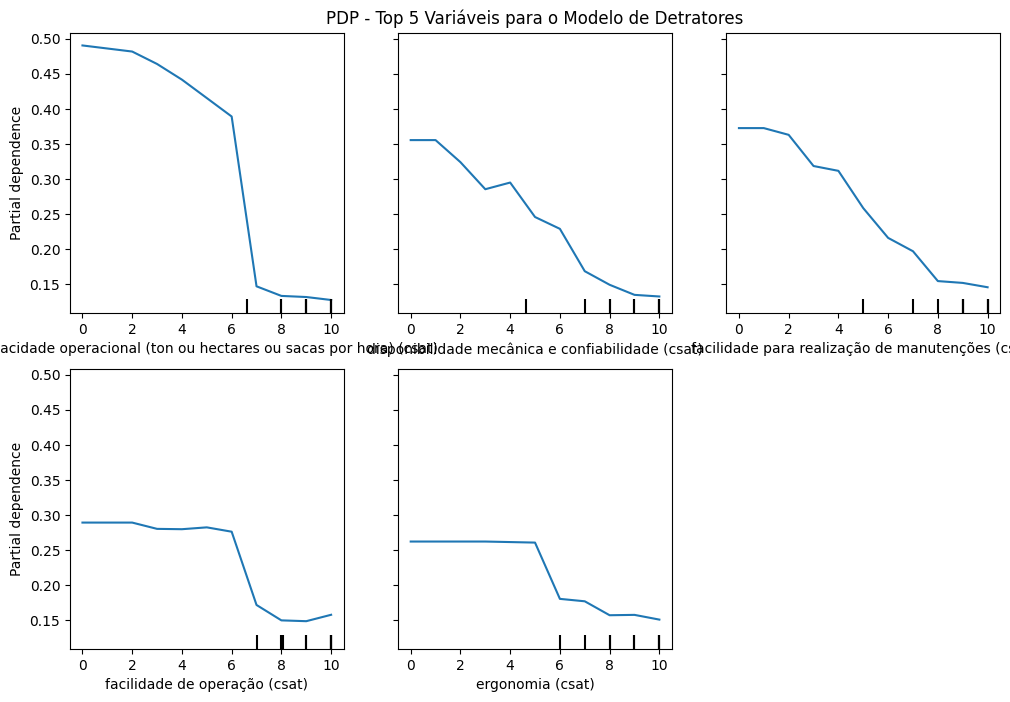

AUC-ROC do modelo de Detratores: 0.98


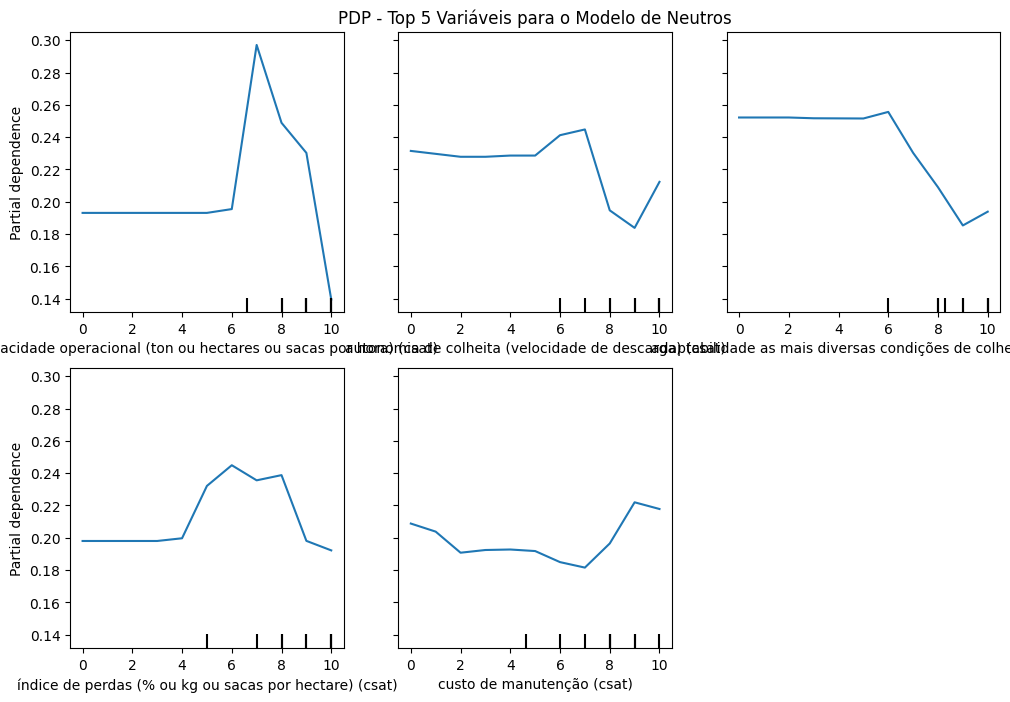

AUC-ROC do modelo de Neutros: 0.78


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.inspection import PartialDependenceDisplay

# Separar os dados (X) e target (y) para Detratores
X = df_copia[perguntas]
y_detrator = df_copia['target_detrator']

# Dividir os dados em treino e teste para Detratores
X_train, X_test, y_train, y_test = train_test_split(X, y_detrator, test_size=0.3, random_state=42)

# Treinamento do modelo para Detratores
modelo_detrator = RandomForestClassifier(random_state=42)
modelo_detrator.fit(X_train, y_train)

# Obter as importâncias das variáveis do modelo de Detratores
importancias_detrator = modelo_detrator.feature_importances_

# Obter as 5 variáveis mais importantes para Detratores
indices_top_detrator = importancias_detrator.argsort()[-5:][::-1]
top_5_detrator = X_train.columns[indices_top_detrator]

# Plotando os gráficos PDP para o Modelo de Detratores
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(modelo_detrator, X_train, features=top_5_detrator, ax=ax)
ax.set_title("PDP - Top 5 Variáveis para o Modelo de Detratores")
plt.show()

# Avaliar a AUC-ROC para o modelo de Detratores
y_pred_proba_detrator = modelo_detrator.predict_proba(X_test)[:, 1]
auc_score_detrator = roc_auc_score(y_test, y_pred_proba_detrator)
print(f"AUC-ROC do modelo de Detratores: {auc_score_detrator:.2f}")

# Separar os dados (X) e target (y) para Neutros
y_neutro = df_copia['target_neutro']

# Dividir os dados em treino e teste para Neutros
X_train_neutro, X_test_neutro, y_train_neutro, y_test_neutro = train_test_split(X, y_neutro, test_size=0.3, random_state=42)

# Treinamento do modelo para Neutros
modelo_neutro = RandomForestClassifier(random_state=42)
modelo_neutro.fit(X_train_neutro, y_train_neutro)

# Obter as importâncias das variáveis do modelo de Neutros
importancias_neutro = modelo_neutro.feature_importances_

# Obter as 5 variáveis mais importantes para Neutros
indices_top_neutro = importancias_neutro.argsort()[-5:][::-1]
top_5_neutro = X_train_neutro.columns[indices_top_neutro]

# Plotando os gráficos PDP para o Modelo de Neutros
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(modelo_neutro, X_train_neutro, features=top_5_neutro, ax=ax)
ax.set_title("PDP - Top 5 Variáveis para o Modelo de Neutros")
plt.show()

# Avaliar a AUC-ROC para o modelo de Neutros
y_pred_proba_neutro = modelo_neutro.predict_proba(X_test_neutro)[:, 1]
auc_score_neutro = roc_auc_score(y_test_neutro, y_pred_proba_neutro)
print(f"AUC-ROC do modelo de Neutros: {auc_score_neutro:.2f}")



Analisando e gerando gráficos PDP para a região: Centro-Oeste
Top 5 variáveis para Detratores na região Centro-Oeste: ['capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'facilidade para realização de manutenções (csat)', 'ergonomia (csat)', 'geração e transmissão de dados para gestão agrícola (csat)', 'disponibilidade mecânica e confiabilidade (csat)']


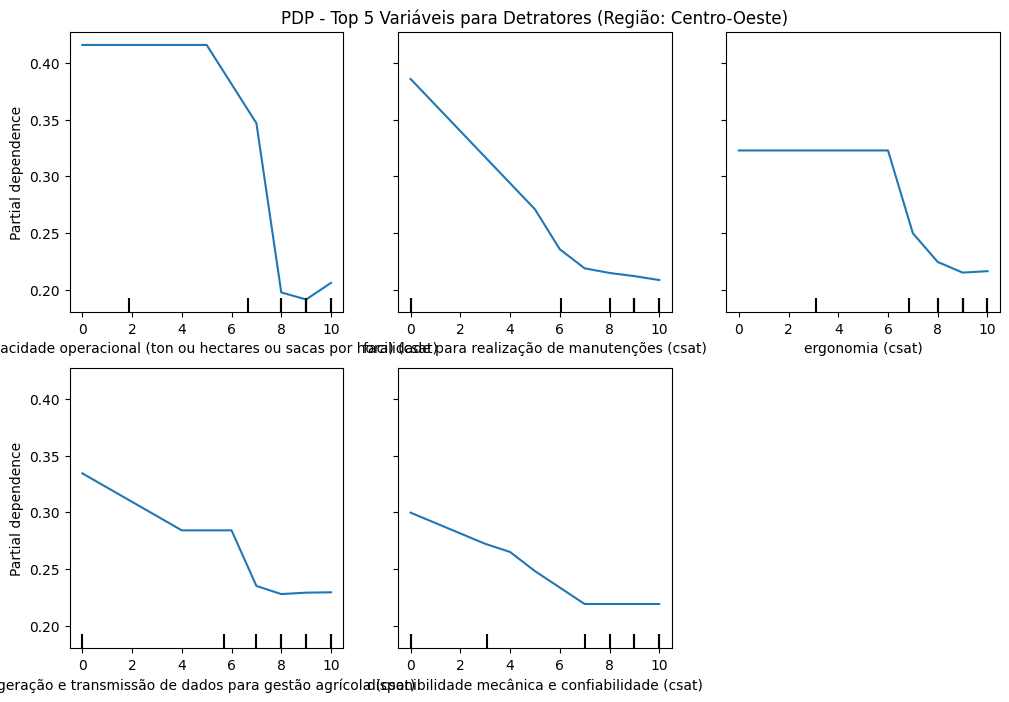

Top 5 variáveis para Neutros na região Centro-Oeste: ['facilidade para realização de manutenções (csat)', 'adaptabilidade aos tipos de grãos colhidos (csat)', 'disponibilidade mecânica e confiabilidade (csat)', 'autonomia de colheita (capacidade do tanque graneleiro) (csat)', 'capacidade operacional (ton ou hectares ou sacas por hora) (csat)']


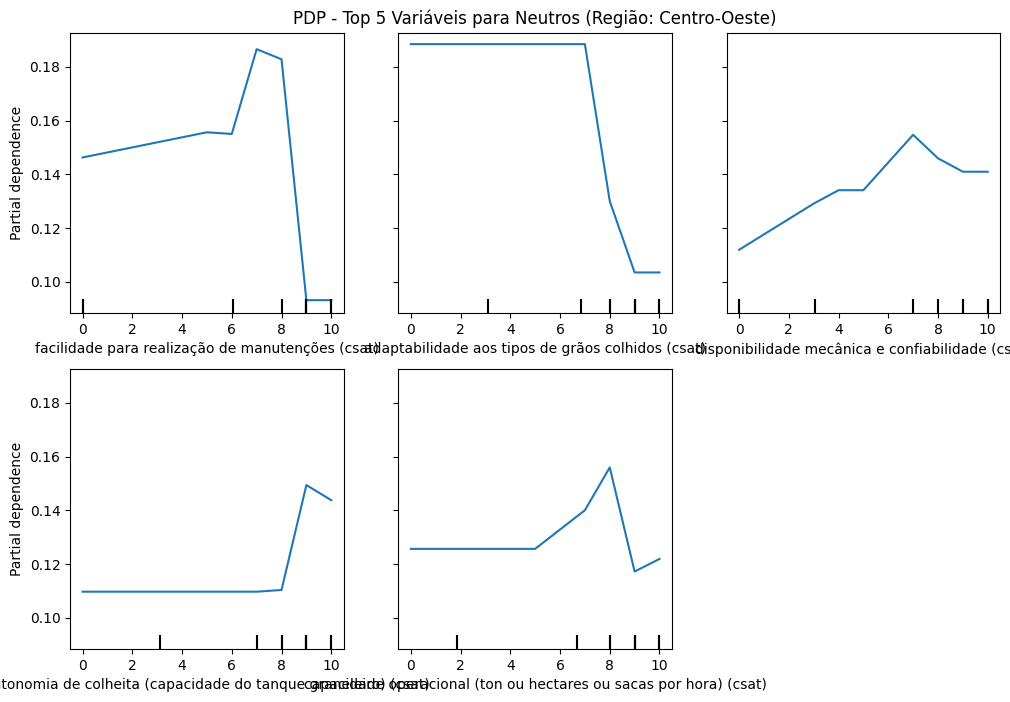


Analisando e gerando gráficos PDP para a região: Não Mapeado
Top 5 variáveis para Detratores na região Não Mapeado: ['capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'adaptabilidade aos tipos de grãos colhidos (csat)', 'qualidade do grão colhido (csat)', 'facilidade de uso do piloto automático e sistemas de mapeamento (csat)', 'compactação do solo (csat)']


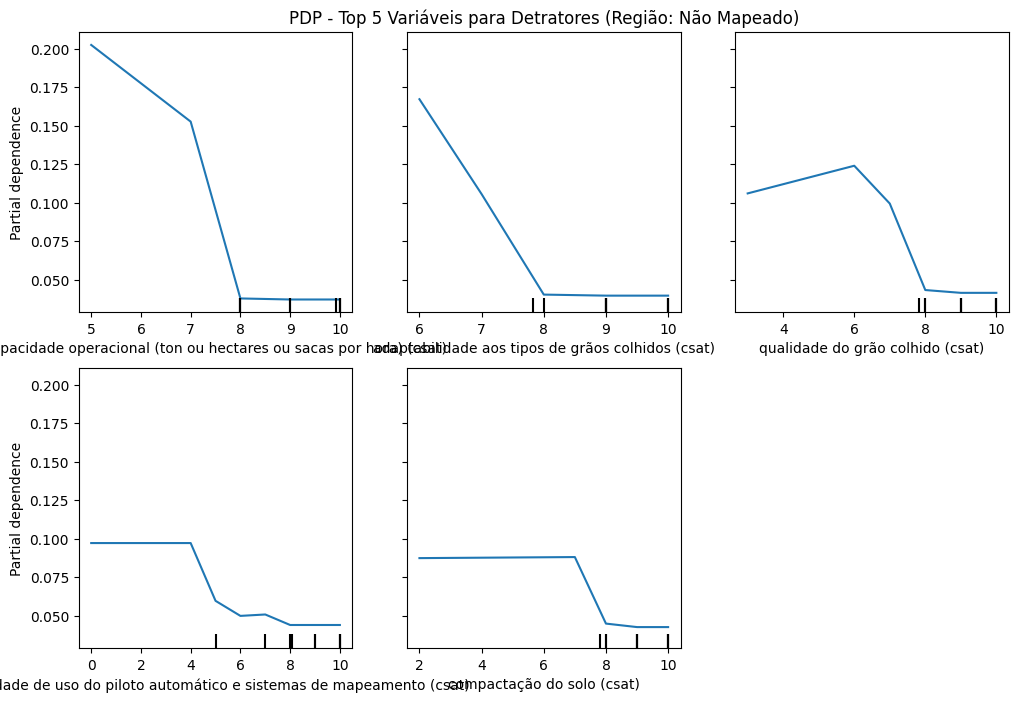

Top 5 variáveis para Neutros na região Não Mapeado: ['geração e transmissão de mapas de colheita (csat)', 'facilidade de uso do piloto automático e sistemas de mapeamento (csat)', 'capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'autonomia de colheita (velocidade de descarga) (csat)', 'ergonomia (csat)']


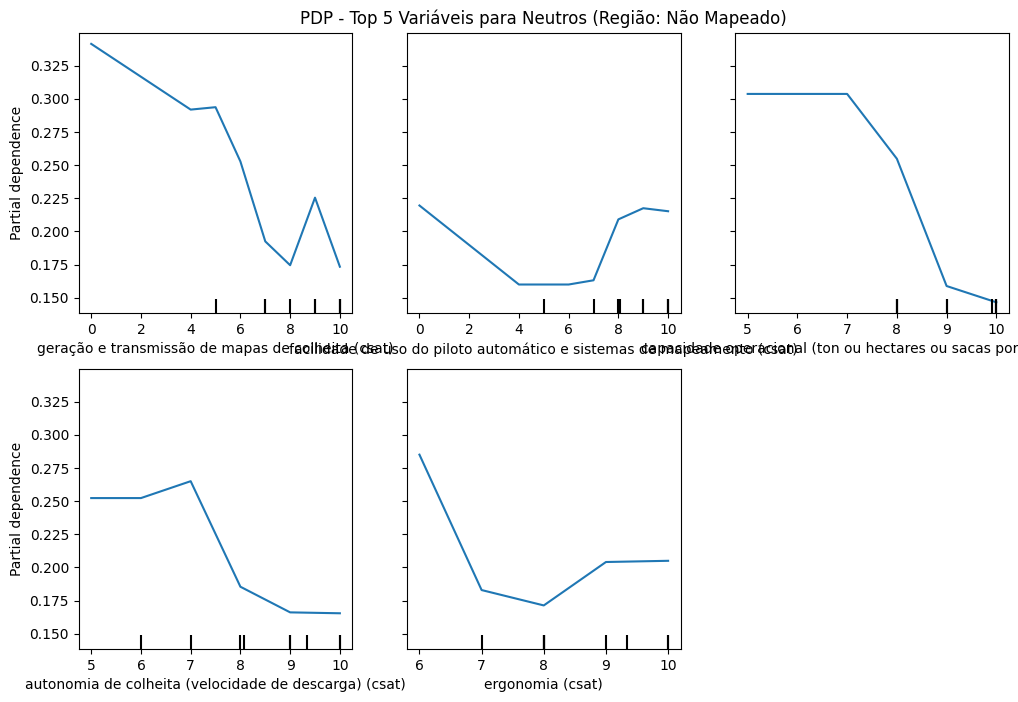


Analisando e gerando gráficos PDP para a região: Sul
Top 5 variáveis para Detratores na região Sul: ['disponibilidade mecânica e confiabilidade (csat)', 'capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'ergonomia (csat)', 'adaptabilidade as mais diversas condições de colheita (csat)', 'facilidade para realização de manutenções (csat)']


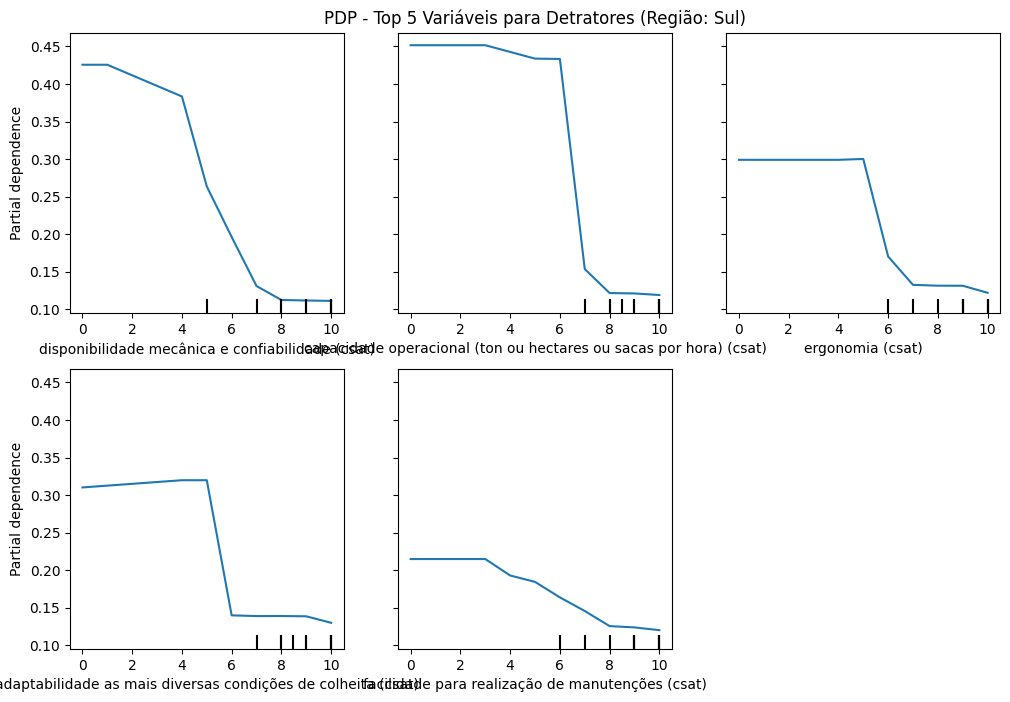

Top 5 variáveis para Neutros na região Sul: ['capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'custo de manutenção (csat)', 'disponibilidade mecânica e confiabilidade (csat)', 'facilidade para realização de manutenções (csat)', 'ergonomia (csat)']


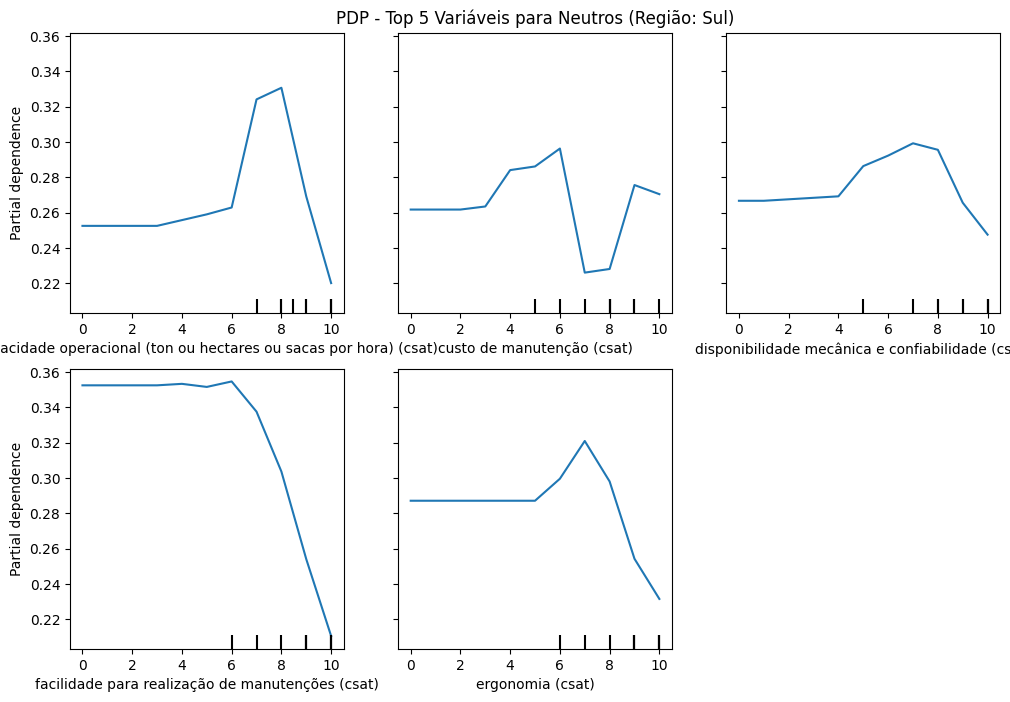


Analisando e gerando gráficos PDP para a região: Norte
Top 5 variáveis para Detratores na região Norte: ['geração e transmissão de mapas de colheita (csat)', 'geração e transmissão de dados para gestão da frota (csat)', 'disponibilidade mecânica e confiabilidade (csat)', 'ergonomia (csat)', 'autonomia de colheita (capacidade do tanque graneleiro) (csat)']


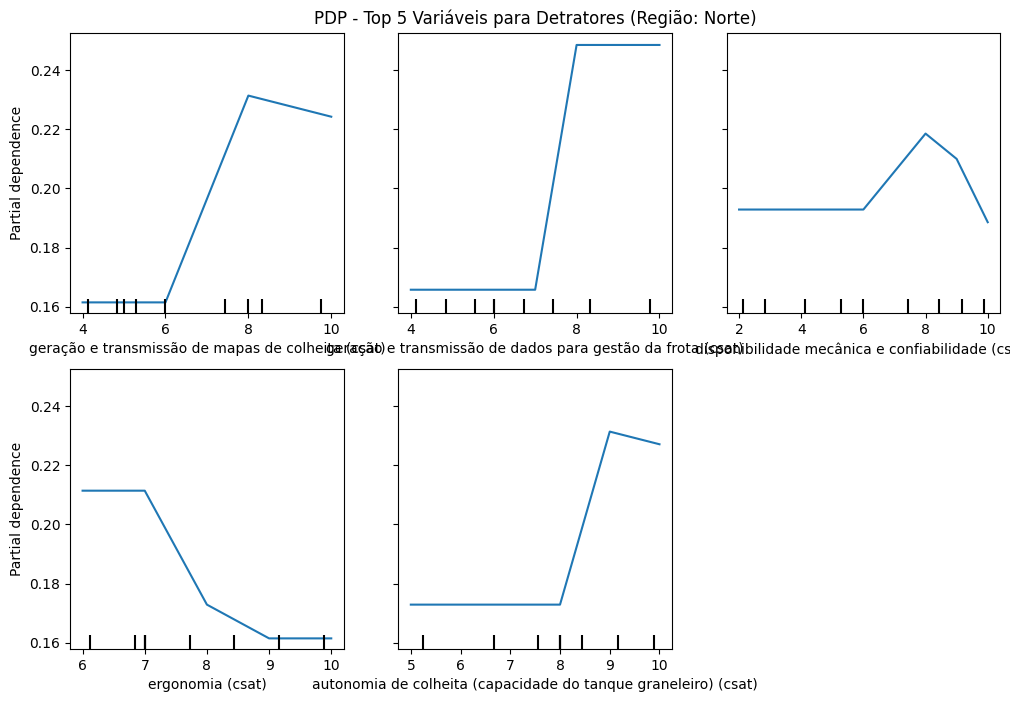

Top 5 variáveis para Neutros na região Norte: ['geração e transmissão de mapas de colheita (csat)', 'disponibilidade mecânica e confiabilidade (csat)', 'geração e transmissão de dados para gestão agrícola (csat)', 'geração e transmissão de dados para gestão da frota (csat)', 'facilidade de uso do piloto automático e sistemas de mapeamento (csat)']


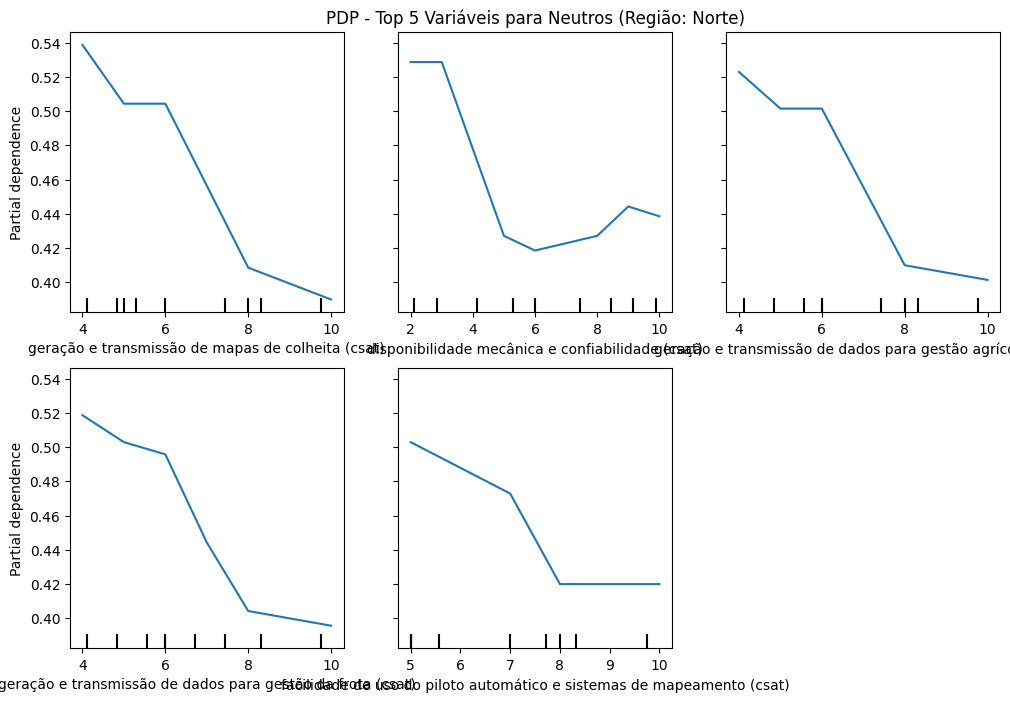


Analisando e gerando gráficos PDP para a região: Sudeste
Top 5 variáveis para Detratores na região Sudeste: ['qualidade do grão colhido (csat)', 'adaptabilidade as mais diversas condições de colheita (csat)', 'capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'facilidade para realização de manutenções (csat)', 'ergonomia (csat)']


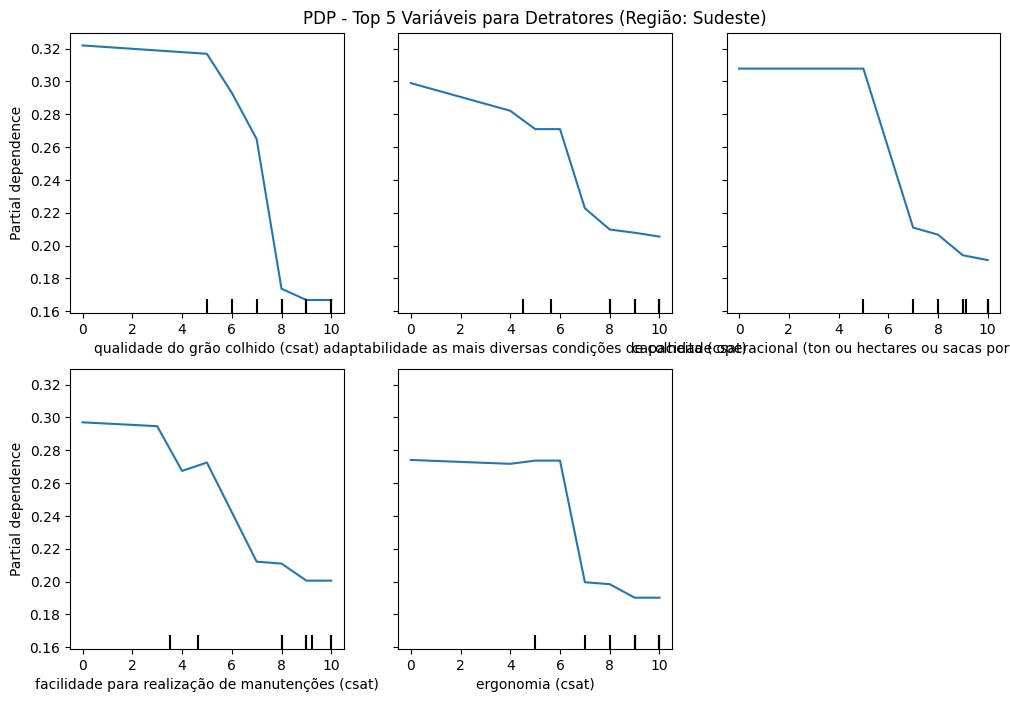

Top 5 variáveis para Neutros na região Sudeste: ['disponibilidade mecânica e confiabilidade (csat)', 'qualidade do grão colhido (csat)', 'adaptabilidade aos tipos de grãos colhidos (csat)', 'geração e transmissão de mapas de colheita (csat)', 'facilidade de operação (csat)']


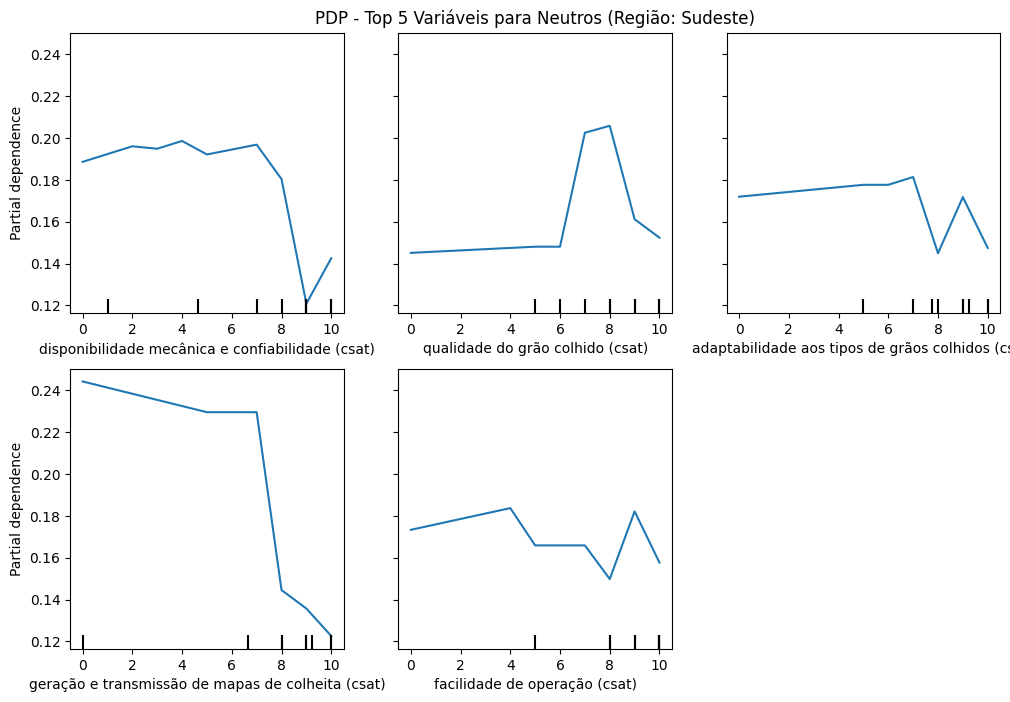


Analisando e gerando gráficos PDP para a região: Nordeste
Região Nordeste tem apenas uma classe no target_detrator. PDP não será gerado para Detratores.
Região Nordeste tem apenas uma classe no target_neutro. PDP não será gerado para Neutros.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Função para identificar as Top 5 variáveis e gerar gráficos PDP por região
def identificar_top5_gerar_pdp(df, regioes, perguntas):
    for regiao in regioes:
        # Filtrar os dados pela região
        df_regiao = df[df['regiao'] == regiao]

        # Verificar se há dados suficientes para análise
        if len(df_regiao) > 0:
            print(f"\nAnalisando e gerando gráficos PDP para a região: {regiao}")

            # Separar as variáveis de entrada (X) e os targets para Detratores e Neutros
            X = df_regiao[perguntas]
            y_detrator = df_regiao['target_detrator']
            y_neutro = df_regiao['target_neutro']

            # Verificar distribuição do target_detrator
            if len(set(y_detrator)) > 1:
                # Dividir os dados em treino e teste para Detratores
                X_train, X_test, y_train, y_test = train_test_split(X, y_detrator, test_size=0.3, random_state=42)

                # Treinar o modelo para Detratores
                modelo_detrator = RandomForestClassifier(random_state=42)
                modelo_detrator.fit(X_train, y_train)

                # Obter as importâncias das variáveis do modelo de Detratores
                importancias_detrator = modelo_detrator.feature_importances_
                indices_top_detrator = importancias_detrator.argsort()[-5:][::-1]
                top_5_detrator = X_train.columns[indices_top_detrator]

                # Gerar gráfico PDP para Detratores
                print(f"Top 5 variáveis para Detratores na região {regiao}: {top_5_detrator.tolist()}")
                fig, ax = plt.subplots(figsize=(12, 8))
                PartialDependenceDisplay.from_estimator(modelo_detrator, X_train, features=top_5_detrator, ax=ax)
                ax.set_title(f"PDP - Top 5 Variáveis para Detratores (Região: {regiao})")
                plt.show()
            else:
                print(f"Região {regiao} tem apenas uma classe no target_detrator. PDP não será gerado para Detratores.")

            # Verificar distribuição do target_neutro
            if len(set(y_neutro)) > 1:
                # Dividir os dados em treino e teste para Neutros
                X_train_neutro, X_test_neutro, y_train_neutro, y_test_neutro = train_test_split(X, y_neutro, test_size=0.3, random_state=42)

                # Treinar o modelo para Neutros
                modelo_neutro = RandomForestClassifier(random_state=42)
                modelo_neutro.fit(X_train_neutro, y_train_neutro)

                # Obter as importâncias das variáveis do modelo de Neutros
                importancias_neutro = modelo_neutro.feature_importances_
                indices_top_neutro = importancias_neutro.argsort()[-5:][::-1]
                top_5_neutro = X_train_neutro.columns[indices_top_neutro]

                # Gerar gráfico PDP para Neutros
                print(f"Top 5 variáveis para Neutros na região {regiao}: {top_5_neutro.tolist()}")
                fig, ax = plt.subplots(figsize=(12, 8))
                PartialDependenceDisplay.from_estimator(modelo_neutro, X_train_neutro, features=top_5_neutro, ax=ax)
                ax.set_title(f"PDP - Top 5 Variáveis para Neutros (Região: {regiao})")
                plt.show()
            else:
                print(f"Região {regiao} tem apenas uma classe no target_neutro. PDP não será gerado para Neutros.")
        else:
            print(f"Sem dados suficientes para a região {regiao}.")

# Chamando a função para processar todas as regiões
regioes = df_copia['regiao'].unique()  # Supondo que a coluna 'regiao' exista
identificar_top5_gerar_pdp(df_copia, regioes, perguntas)


In [ ]:
df_nordeste = df_copia[df_copia['regiao'] == 'Nordeste']

print("Distribuição de target_detrator na região Nordeste:")
print(df_nordeste['target_detrator'].value_counts())

print("Distribuição de target_neutro na região Nordeste:")
print(df_nordeste['target_neutro'].value_counts())


Distribuição de target_detrator na região Nordeste:
target_detrator
0    3
Name: count, dtype: int64
Distribuição de target_neutro na região Nordeste:
target_neutro
0    3
Name: count, dtype: int64



Analisando e gerando gráficos PDP para o período de pesquisa: Outros
Top 5 variáveis para Detratores no período de pesquisa Outros: ['disponibilidade mecânica e confiabilidade (csat)', 'índice de perdas (% ou kg ou sacas por hectare) (csat)', 'capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'facilidade de operação (csat)', 'facilidade para realização de manutenções (csat)']


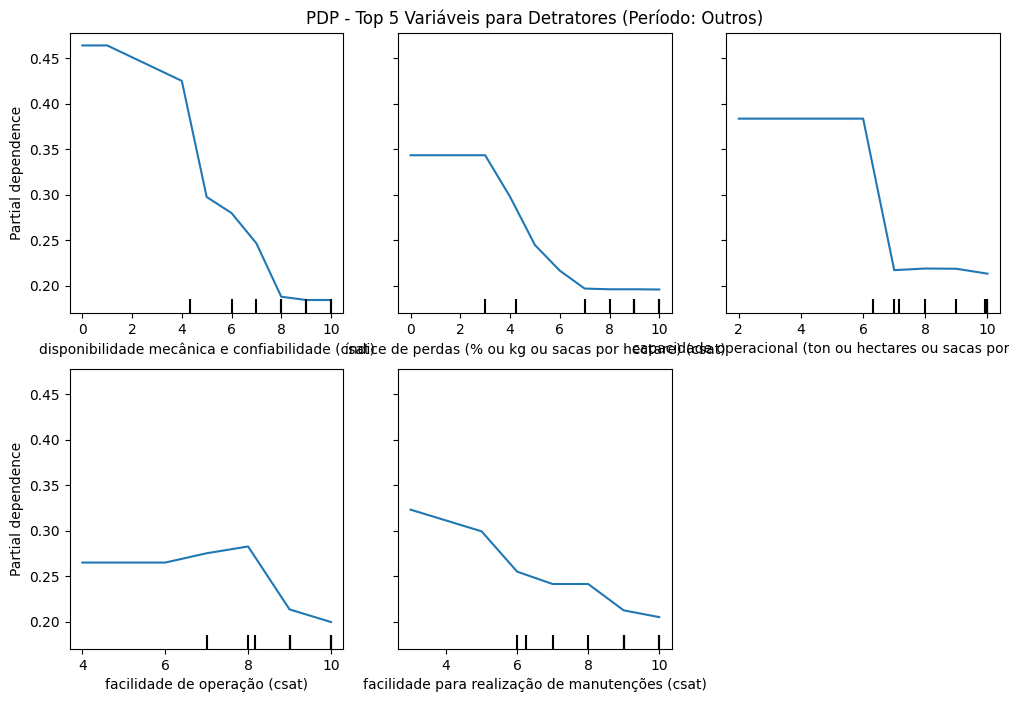

Top 5 variáveis para Neutros no período de pesquisa Outros: ['geração e transmissão de mapas de colheita (csat)', 'autonomia de colheita (velocidade de descarga) (csat)', 'facilidade para realização de manutenções (csat)', 'geração e transmissão de dados para gestão agrícola (csat)', 'autonomia de colheita (capacidade do tanque graneleiro) (csat)']


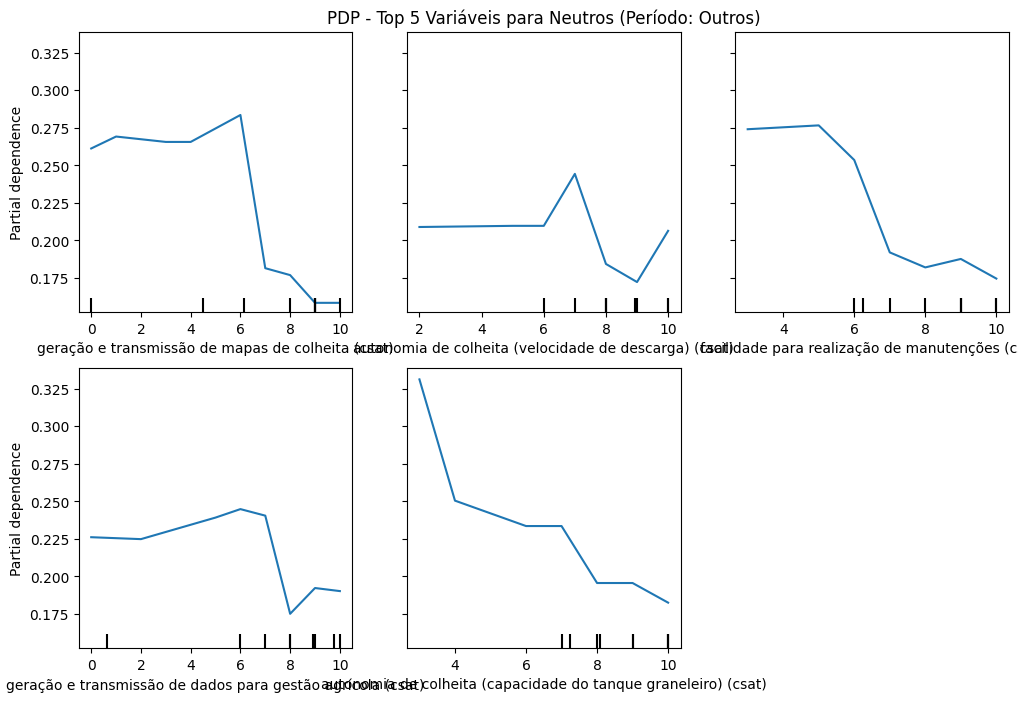


Analisando e gerando gráficos PDP para o período de pesquisa: 18 a 30 M
Top 5 variáveis para Detratores no período de pesquisa 18 a 30 M: ['capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'disponibilidade mecânica e confiabilidade (csat)', 'facilidade de operação (csat)', 'facilidade para realização de manutenções (csat)', 'ergonomia (csat)']


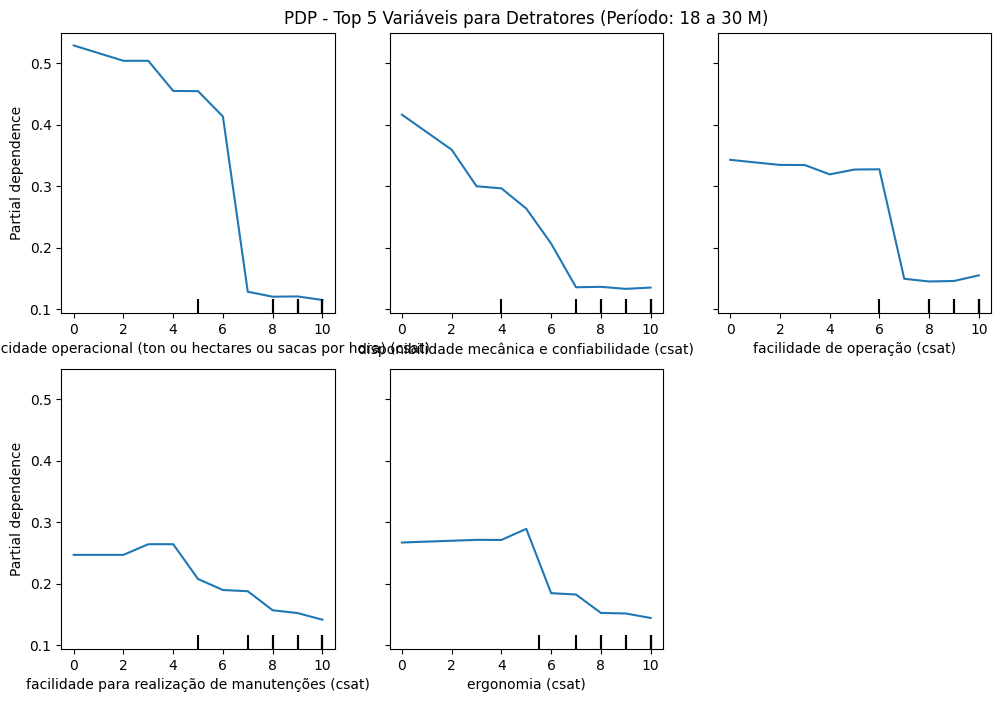

Top 5 variáveis para Neutros no período de pesquisa 18 a 30 M: ['disponibilidade mecânica e confiabilidade (csat)', 'capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'facilidade para realização de manutenções (csat)', 'facilidade de operação (csat)', 'adaptabilidade as mais diversas condições de colheita (csat)']


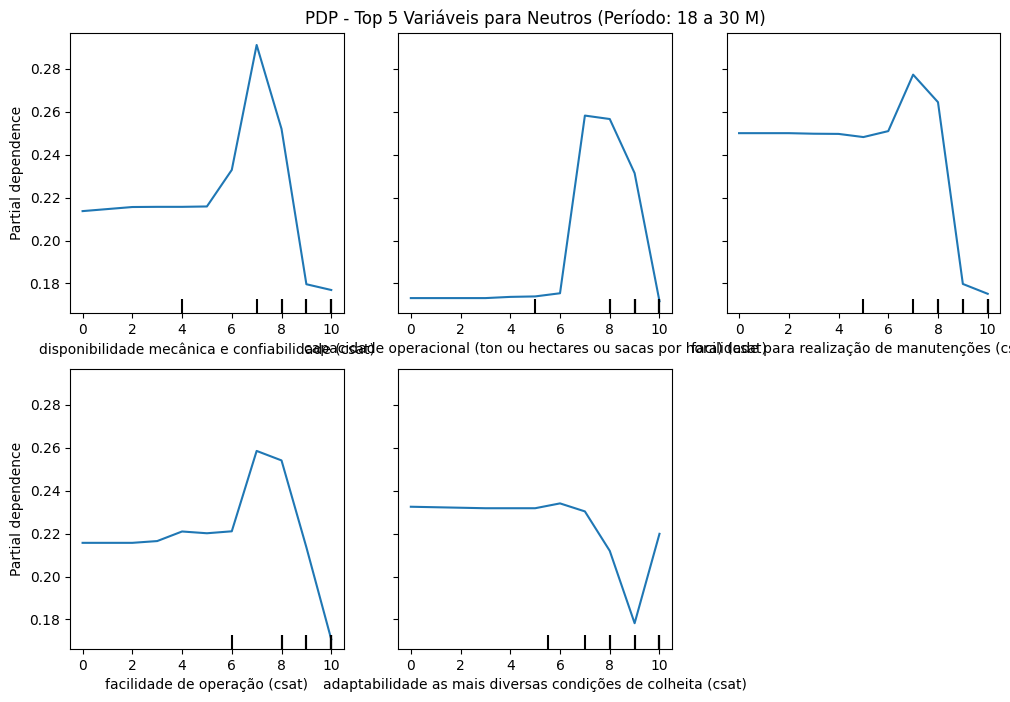


Analisando e gerando gráficos PDP para o período de pesquisa: 12 a 18 M
Top 5 variáveis para Detratores no período de pesquisa 12 a 18 M: ['adaptabilidade aos tipos de grãos colhidos (csat)', 'qualidade do grão colhido (csat)', 'capacidade operacional (ton ou hectares ou sacas por hora) (csat)', 'autonomia de colheita (capacidade do tanque graneleiro) (csat)', 'adaptabilidade as mais diversas condições de colheita (csat)']


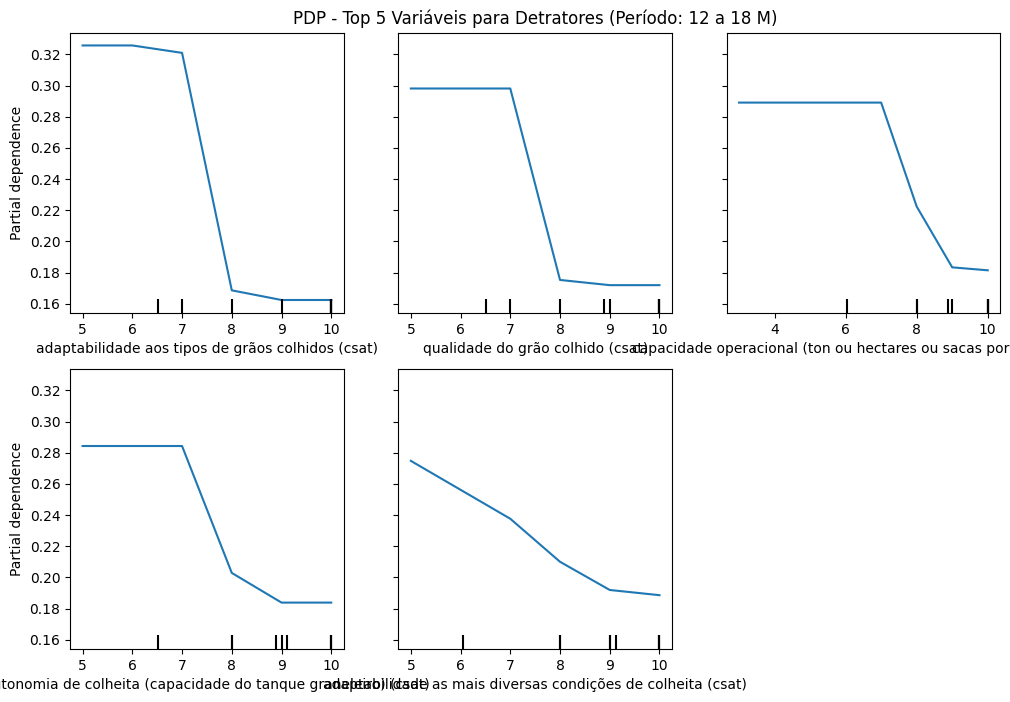

Top 5 variáveis para Neutros no período de pesquisa 12 a 18 M: ['custo de manutenção (csat)', 'geração e transmissão de mapas de colheita (csat)', 'autonomia de colheita (capacidade do tanque graneleiro) (csat)', 'facilidade de uso do piloto automático e sistemas de mapeamento (csat)', 'facilidade para realização de manutenções (csat)']


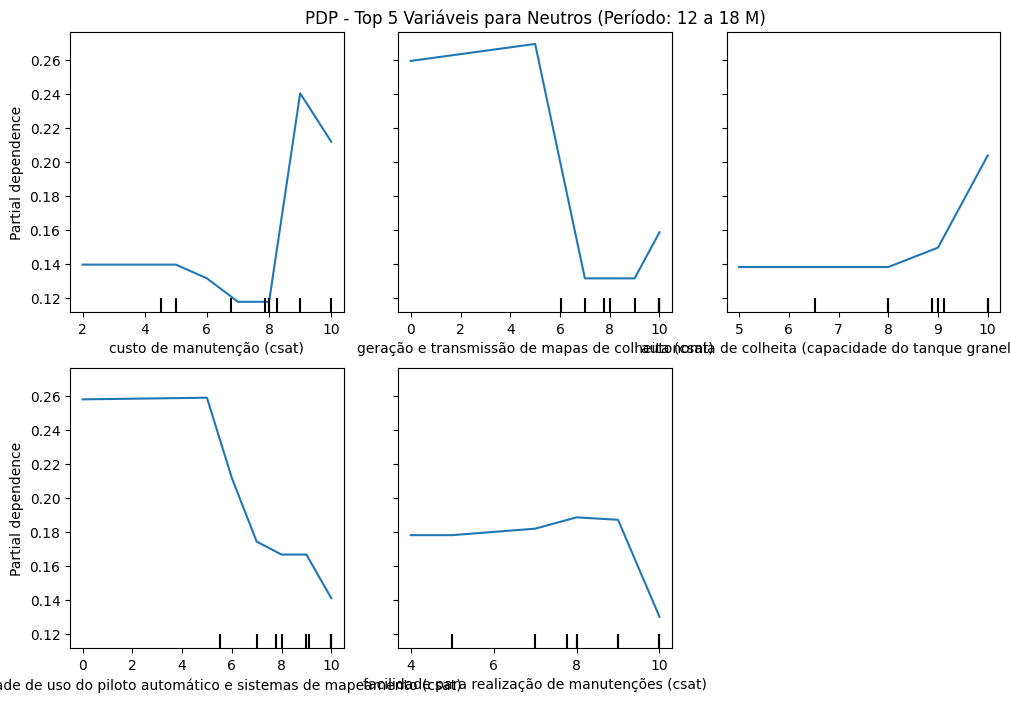

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Função para realizar a análise binária e gerar gráficos PDP por período de pesquisa
def analise_pdp_por_periodo(df, periodos, perguntas):
    for periodo in periodos:
        # Filtrar os dados pelo período de pesquisa
        df_periodo = df[df['Periodo de Pesquisa'] == periodo]

        # Verificar se há dados suficientes para análise
        if len(df_periodo) > 3:  # Verificar se há pelo menos 3 amostras para treinar/testar
            print(f"\nAnalisando e gerando gráficos PDP para o período de pesquisa: {periodo}")

            # Separar as variáveis de entrada (X) e os targets para Detratores e Neutros
            X = df_periodo[perguntas]
            y_detrator = df_periodo['target_detrator']
            y_neutro = df_periodo['target_neutro']

            # Verificar distribuição do target_detrator
            if len(set(y_detrator)) > 1:
                # Dividir os dados em treino e teste para Detratores
                X_train, X_test, y_train, y_test = train_test_split(X, y_detrator, test_size=0.3, random_state=42)

                # Treinar o modelo para Detratores
                modelo_detrator = RandomForestClassifier(random_state=42)
                modelo_detrator.fit(X_train, y_train)

                # Obter as 5 variáveis mais importantes para Detratores
                importancias_detrator = modelo_detrator.feature_importances_
                indices_top_detrator = importancias_detrator.argsort()[-5:][::-1]
                top_5_detrator = X_train.columns[indices_top_detrator]

                # Gerar gráfico PDP para Detratores
                print(f"Top 5 variáveis para Detratores no período de pesquisa {periodo}: {top_5_detrator.tolist()}")
                fig, ax = plt.subplots(figsize=(12, 8))
                PartialDependenceDisplay.from_estimator(modelo_detrator, X_train, features=top_5_detrator, ax=ax)
                ax.set_title(f"PDP - Top 5 Variáveis para Detratores (Período: {periodo})")
                plt.show()
            else:
                print(f"Período {periodo} tem apenas uma classe no target_detrator. PDP não será gerado para Detratores.")

            # Verificar distribuição do target_neutro
            if len(set(y_neutro)) > 1:
                # Dividir os dados em treino e teste para Neutros
                X_train_neutro, X_test_neutro, y_train_neutro, y_test_neutro = train_test_split(X, y_neutro, test_size=0.3, random_state=42)

                # Treinar o modelo para Neutros
                modelo_neutro = RandomForestClassifier(random_state=42)
                modelo_neutro.fit(X_train_neutro, y_train_neutro)

                # Obter as 5 variáveis mais importantes para Neutros
                importancias_neutro = modelo_neutro.feature_importances_
                indices_top_neutro = importancias_neutro.argsort()[-5:][::-1]
                top_5_neutro = X_train_neutro.columns[indices_top_neutro]

                # Gerar gráfico PDP para Neutros
                print(f"Top 5 variáveis para Neutros no período de pesquisa {periodo}: {top_5_neutro.tolist()}")
                fig, ax = plt.subplots(figsize=(12, 8))
                PartialDependenceDisplay.from_estimator(modelo_neutro, X_train_neutro, features=top_5_neutro, ax=ax)
                ax.set_title(f"PDP - Top 5 Variáveis para Neutros (Período: {periodo})")
                plt.show()
            else:
                print(f"Período {periodo} tem apenas uma classe no target_neutro. PDP não será gerado para Neutros.")
        else:
            print(f"Sem dados suficientes para o período de pesquisa {periodo}. Considere adicionar mais dados ou combinar períodos semelhantes.")

# Chamando a função para processar todos os períodos
periodos = df_copia['Periodo de Pesquisa'].unique()  # Supondo que a coluna 'Periodo de Pesquisa' existe
analise_pdp_por_periodo(df_copia, periodos, perguntas)
